<center><h1>EDA for Project Arrhythmia</h1></center>

## Data pre processing stages

### Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

### Loding the required .csv (data) file

In [2]:
df=pd.read_csv("Data/arrhythmia.csv", header=None)

### Inspecting first 5 rows of the dataset

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


### Inspecting last 5 rows of the dataset

In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


### Inspecting the dimension of the dataset

In [5]:
df.shape

(452, 280)

### Obtaining concise summary of the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


### Obtaining descriptive statistics of the dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,452.0,46.471239,16.466631,0.0,36.00,47.00,58.000,83.0
1,452.0,0.550885,0.497955,0.0,0.00,1.00,1.000,1.0
2,452.0,166.188053,37.170340,105.0,160.00,164.00,170.000,780.0
3,452.0,68.170354,16.590803,6.0,59.00,68.00,79.000,176.0
4,452.0,88.920354,15.364394,55.0,80.00,86.00,94.000,188.0
...,...,...,...,...,...,...,...,...
275,452.0,0.514823,0.347531,-0.8,0.40,0.50,0.700,2.4
276,452.0,1.222345,1.426052,-6.0,0.50,1.35,2.100,6.0
277,452.0,19.326106,13.503922,-44.2,11.45,18.10,25.825,88.8
278,452.0,29.473230,18.493927,-38.6,17.55,27.90,41.125,115.9


### counting total number of null values

In [8]:
df.isnull().sum().sum()

np.int64(0)

### Replacing the "?" with np.nan value

In [9]:
df = df.replace('?',np.nan)

### Final counting total number of null values in dataset

In [10]:
nu = pd.isnull(df).sum().sum()
nu

np.int64(408)

### Visualizing the distribution of our missing data

Text(0, 0.5, 'Total number of null values in each column')

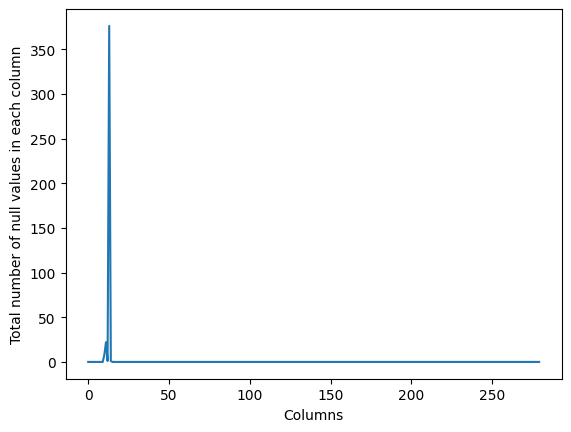

In [11]:
pd.isnull(df).sum().plot()
plt.xlabel("Columns")
plt.ylabel("Total number of null values in each column")

### Zooming into the visualization

Text(0, 0.5, 'Total number of null values in each column')

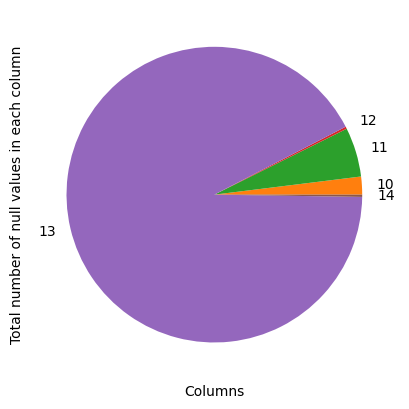

In [12]:
pd.isnull(df).sum()[9:16].plot(kind="pie")
plt.xlabel("Columns")
plt.ylabel("Total number of null values in each column")

### Visualizing the exact column of missing values

Text(0, 0.5, 'Total number of nuill values in each column')

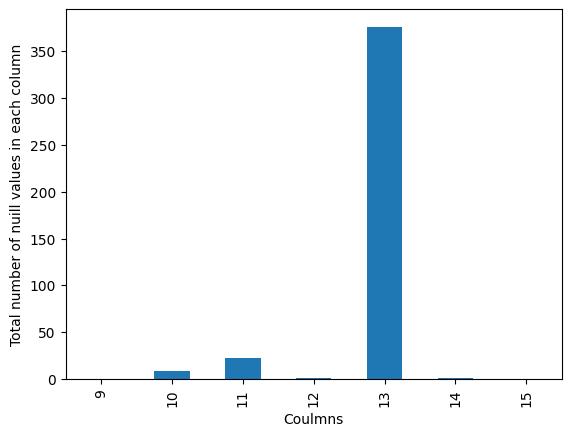

In [13]:
pd.isnull(df).sum()[9:16].plot(kind="bar")
plt.xlabel("Coulmns")
plt.ylabel("Total number of nuill values in each column")

### Dropping Column 13 as it has high number of missing elements

In [14]:
df.drop(columns =13, inplace=True)

### Making a copy to avoid affecting the main dataset

In [15]:
new_df = df.copy()

### Imputation

In [16]:
my_imputer = SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns = df.columns

### Inspecting the Imputed DataFrame

In [17]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


### Dataset with zero null values.

In [18]:
pd.isnull(new_df).sum().sum()

np.int64(0)

### Generating the final dataset

In [19]:
final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

### Adding Column names to dataset

In [20]:
new_df.columns=final_df_columns
new_df.to_csv("new data with target class.csv")
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


### Removing target Attribute to Create a final dataframe.

In [21]:
final_df = new_df.drop(columns ="class")
final_df.to_csv("FInal Dataset with dropped class Attribute.csv")
final_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


In [22]:
pd.isnull(final_df).sum().sum()

np.int64(0)

## EDA (Exploratory data analysis) stage

### Making a list with all 16 class Names
#### (List with class names)

In [23]:
class_names=["Normal", 
               "Ischemic changes (CAD)", 
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy", 
               "Sinus bradycardy", 
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"] 

### Analyze the dataset and check how many examples we have for each class
#### Just checking for the datatypes of attributes

In [24]:
final_df[["Age","Heart_Rate"]].dtypes

Age           float64
Heart_Rate    float64
dtype: object

### Sorting with respect to class attribute

In [25]:
t=new_df.sort_values(by=["class"])

### Counting the number of instances for each class

In [26]:
la = t["class"].value_counts(sort=False).tolist()
la

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

### Visualization of dataset with respect to class

In [27]:
labels = class_names
values = la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


### we normalize the data with base 10 logarithm to be able to "plot them in a decent way"

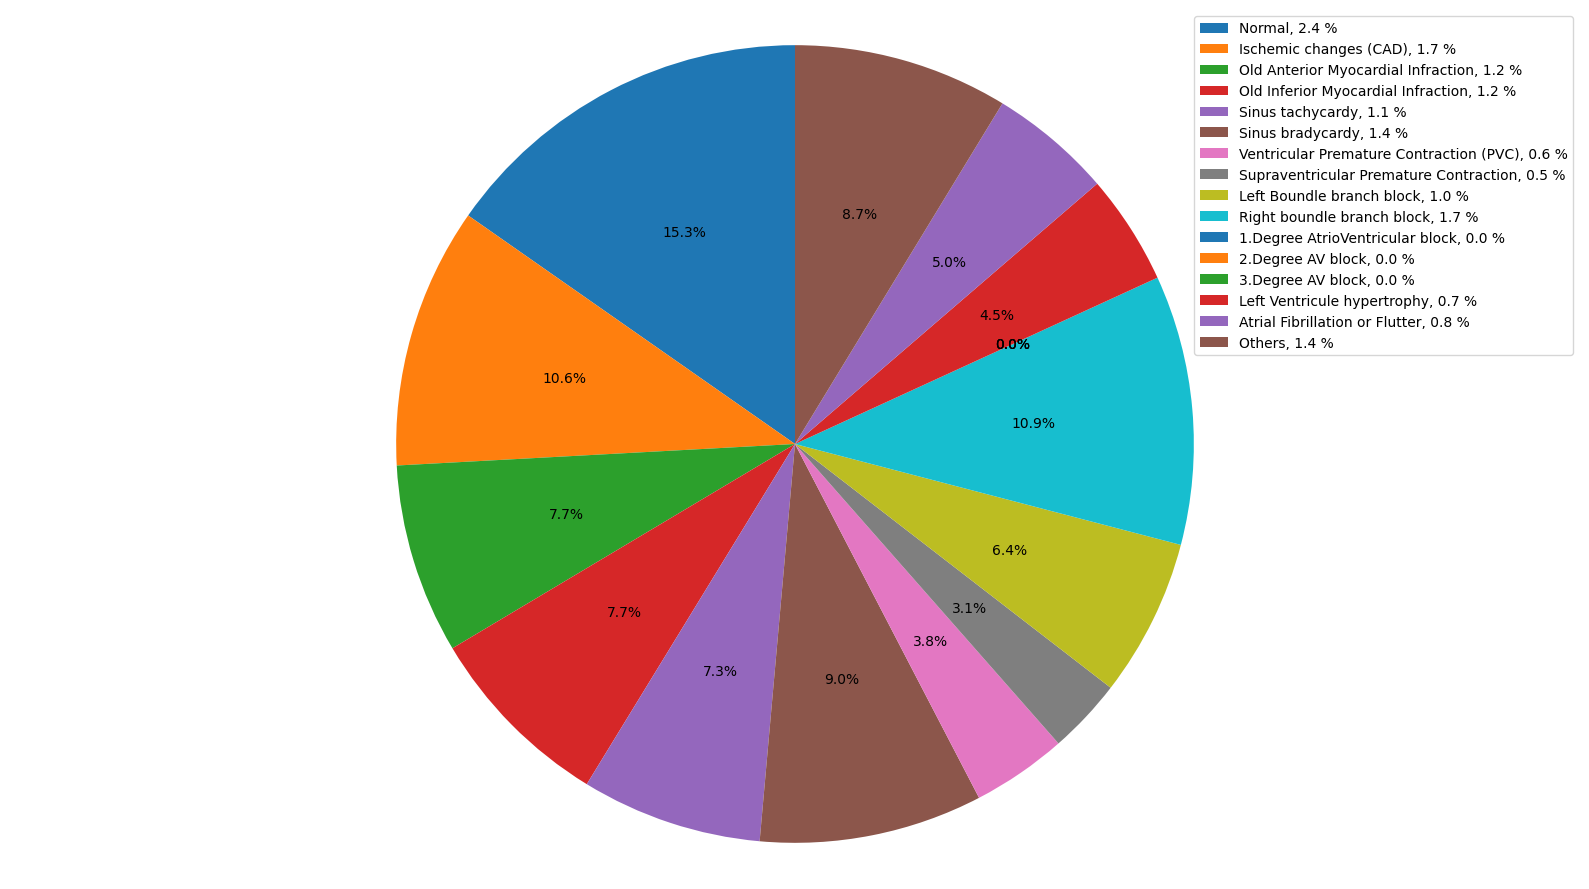

In [28]:
Log_Norm = []
for i in values:
    Log_Norm.append(mt.log10(i+1))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(Log_Norm, autopct='%1.1f%%', startangle=90)

leg = plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, Log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()

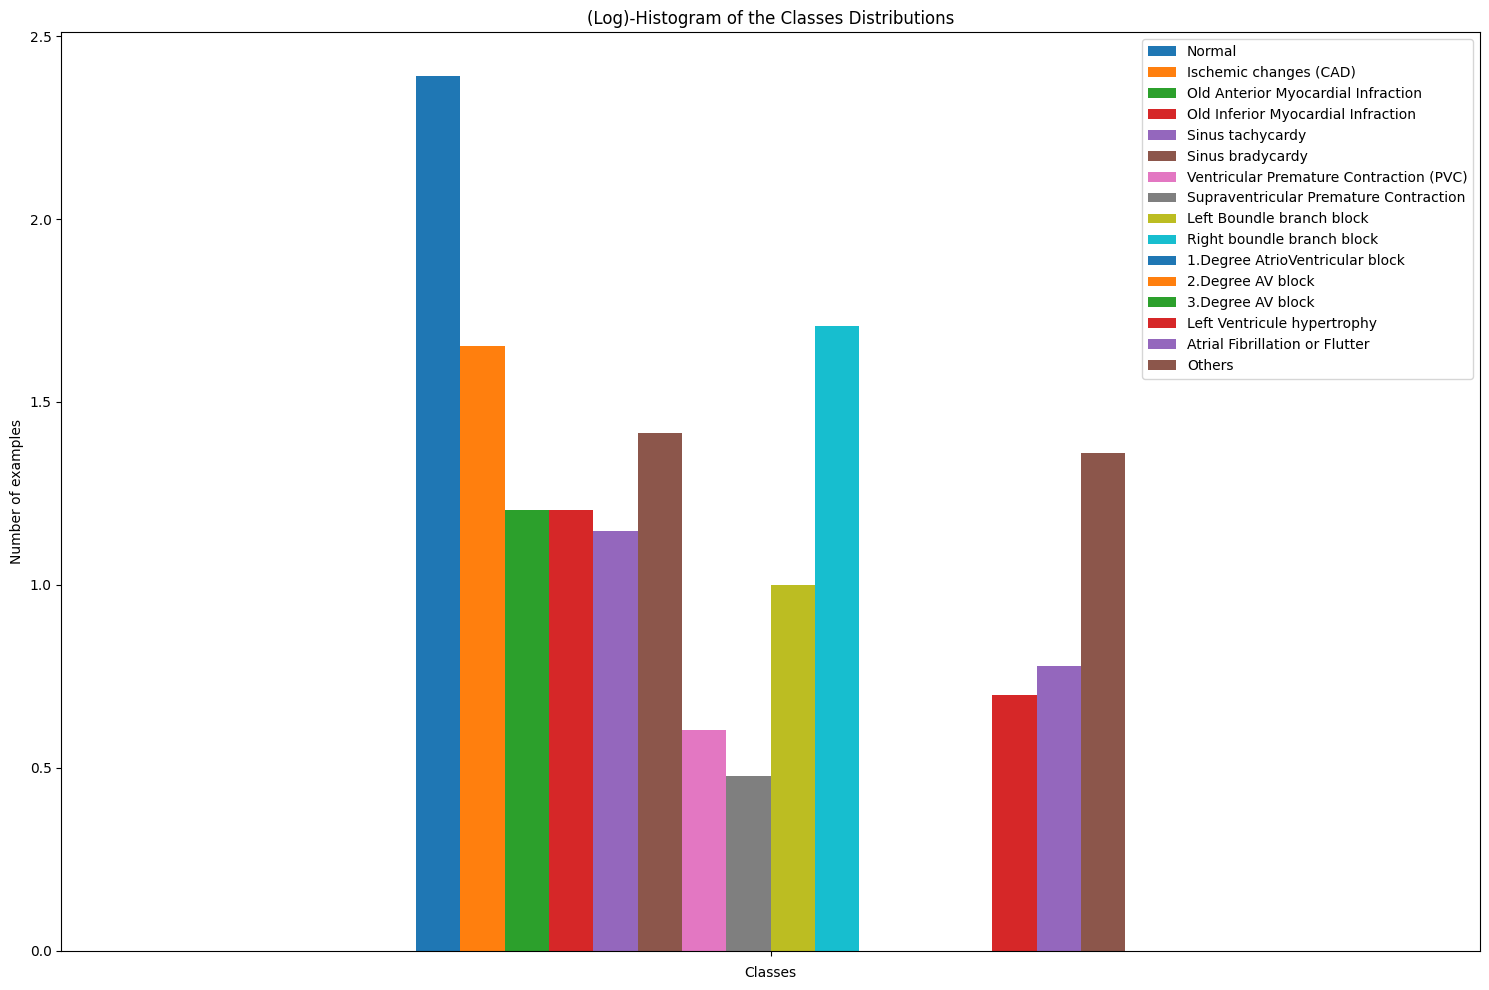

In [29]:
fdict = {}
j = 0
for i in labels:
    fdict[i]=Log_Norm[j]
    j+=1
fdf = pd.DataFrame(fdict,index=[0])
fdf = fdf.rename(index={0: ''})
fig, ax = plt.subplots(figsize=(15,10))
fdf.plot(kind="bar", ax=ax)
ax.set_title("(Log)-Histogram of the Classes Distributions")
ax.set_ylabel("Number of examples")
ax.set_xlabel("Classes")
fig.tight_layout()
plt.show()

### Grouped Description

In [30]:
grouped_mean = new_df.groupby(["class"]).mean()
grouped_median = new_df.groupby(["class"]).median()
grouped_mode = new_df.groupby(["class"]).agg(lambda x: sp.stats.mode(x)[0])
grouped_std = new_df.groupby(["class"]).std()

In [31]:
grouped_median.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
class,,,,,,,,,,,,,,,,,,,,,
1.0,46.0,1.0,163.0,68.0,84.0,156.0,367.0,160.0,91.0,41.0,...,-0.1,0.0,9.1,-0.9,0.0,0.0,0.5,1.6,19.10,31.7
2.0,55.0,1.0,160.5,70.0,90.5,159.0,366.0,176.5,91.0,37.5,...,-0.8,0.0,9.6,-1.3,0.0,0.0,0.5,-0.8,20.05,11.8
3.0,50.0,0.0,170.0,74.0,93.0,163.0,351.0,196.0,96.0,48.0,...,-0.2,0.0,6.3,-2.0,0.0,0.0,0.8,0.6,12.30,19.3
4.0,57.0,0.0,165.0,76.0,93.0,157.0,357.0,161.0,95.0,-2.0,...,-0.2,-0.7,6.3,-0.5,0.0,0.0,0.7,0.3,10.90,12.0
5.0,34.0,1.0,160.0,51.0,82.0,155.0,302.0,153.0,81.0,52.0,...,-0.3,0.0,5.1,-2.1,0.0,0.0,0.5,0.9,6.00,10.7


### Co-relational heatmap

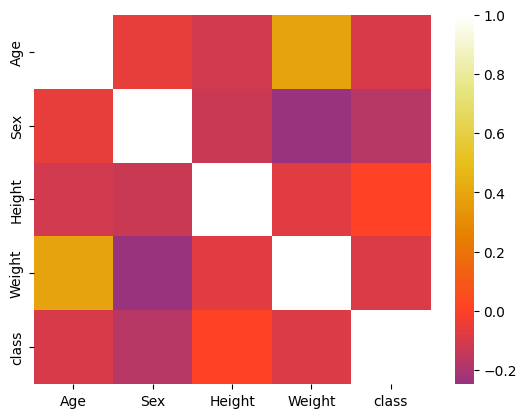

In [32]:
sns.heatmap(new_df[['Age','Sex','Height','Weight','class']].corr(), cmap='CMRmap', center=0)
plt.show()

##### Setting a color palette to be used

In [33]:
palette1=['red','blue']

### Looking for pairwise relationships and outliers

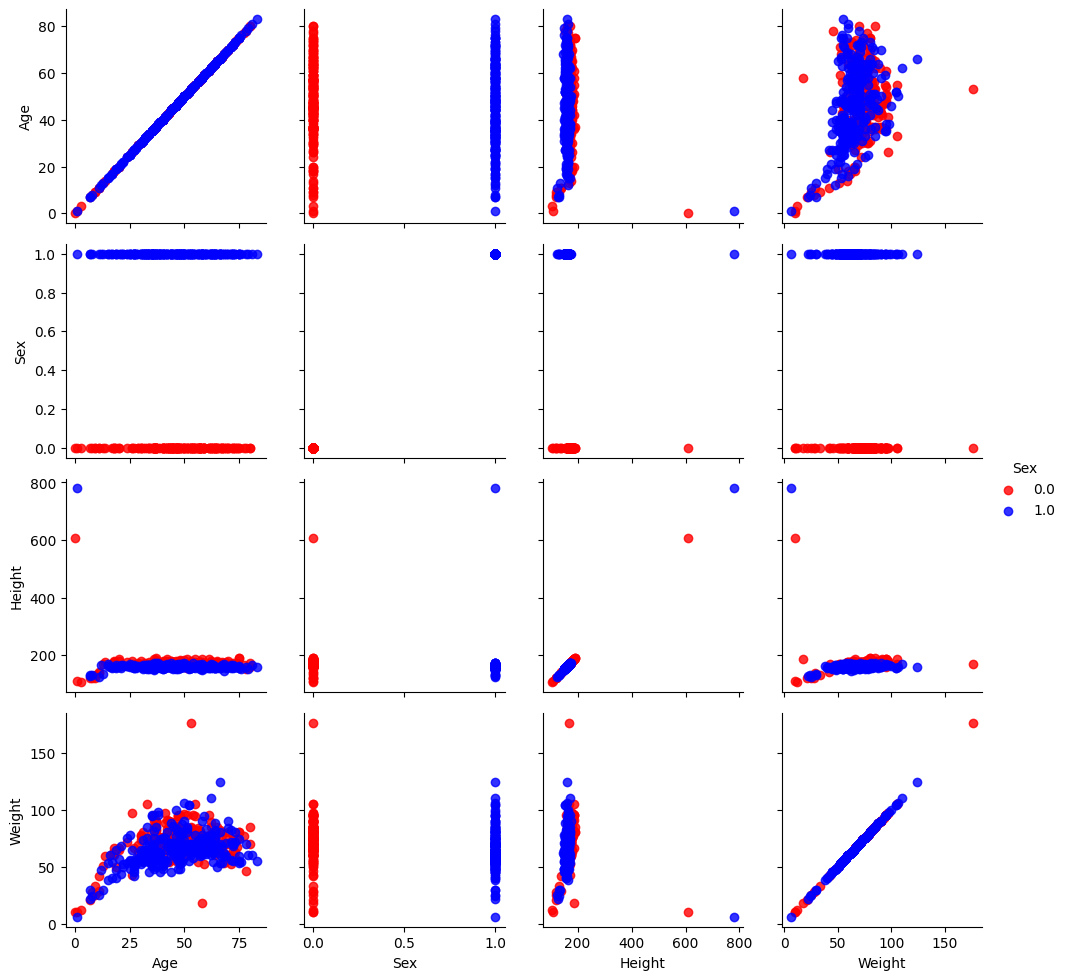

In [34]:
g = sns.PairGrid(final_df, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette=palette1)
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [35]:
sorted(final_df['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

In [36]:
final_df["Height"]=final_df["Height"].replace(608,108)
final_df["Height"]=final_df["Height"].replace(780,180)

In [37]:
sorted(final_df["Weight"], reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

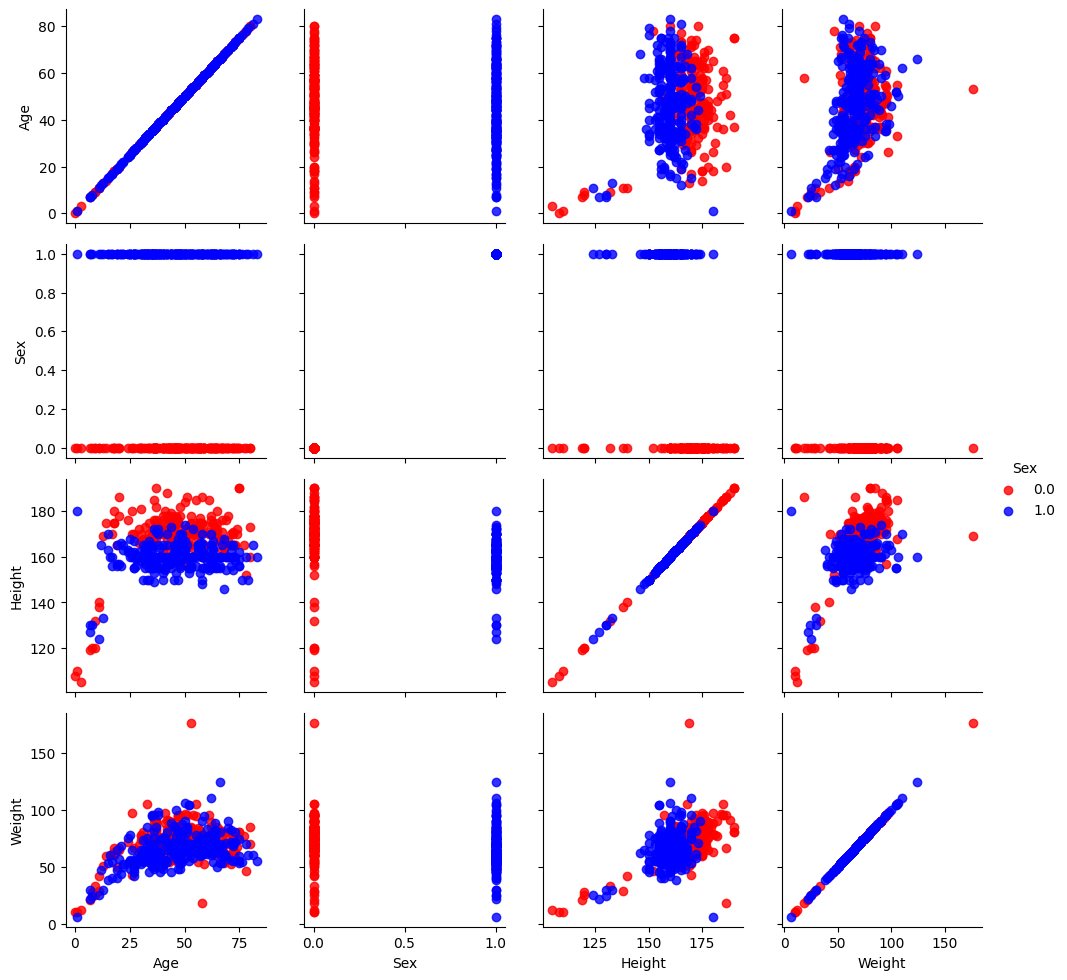

In [38]:
g = sns.PairGrid(final_df, vars=['Age','Sex','Height','Weight'],
                 hue='Sex',palette=palette1)
g.map(plt.scatter, alpha=0.8)
g.add_legend();

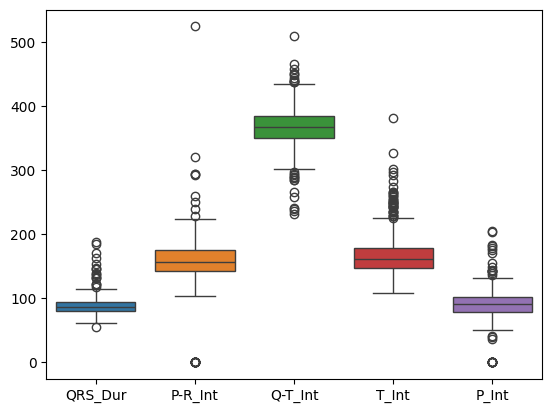

In [39]:
sns.boxplot(data=final_df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

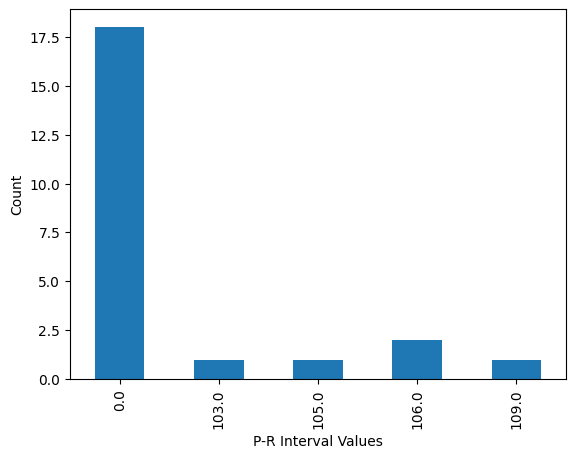

In [40]:
final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

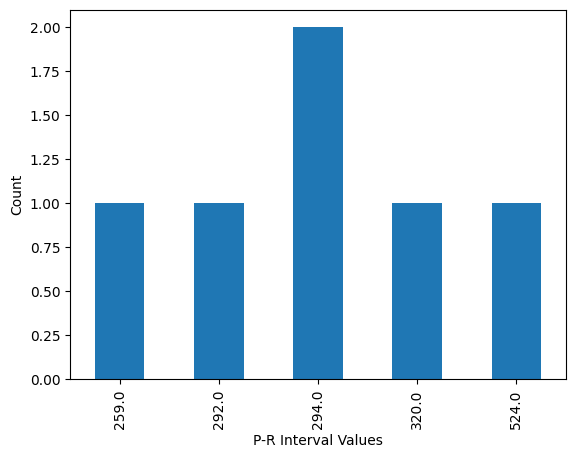

In [41]:
final_df['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel("P-R Interval Values")
plt.ylabel("Count");

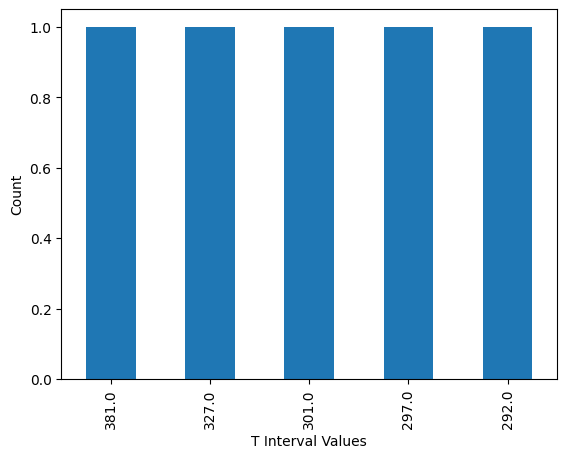

In [42]:
final_df['T_Int'].value_counts().sort_index(ascending=False).head().plot(kind='bar')
plt.xlabel('T Interval Values')
plt.ylabel('Count');

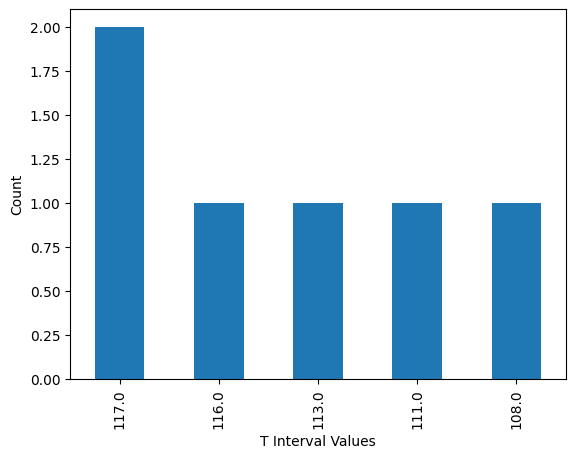

In [43]:
final_df['T_Int'].value_counts().sort_index(ascending=False).tail().plot(kind='bar')
plt.xlabel("T Interval Values")
plt.ylabel('Count');

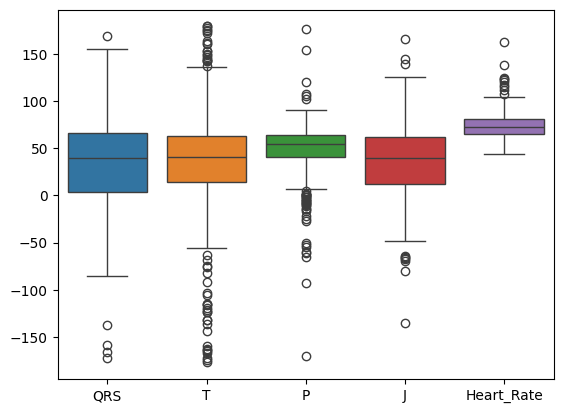

In [44]:
sns.boxplot(data=final_df[["QRS","T","P","J","Heart_Rate"]]);

/media/heytanix/Shared/JupyterLabEnvironment/Jupyter3_13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/media/heytanix/Shared/JupyterLabEnvironment/Jupyter3_13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/media/heytanix/Shared/JupyterLabEnvironment/Jupyter3_13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 55.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/media/heytanix/Shared/JupyterLabEnvironment/Jupyter3_13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size

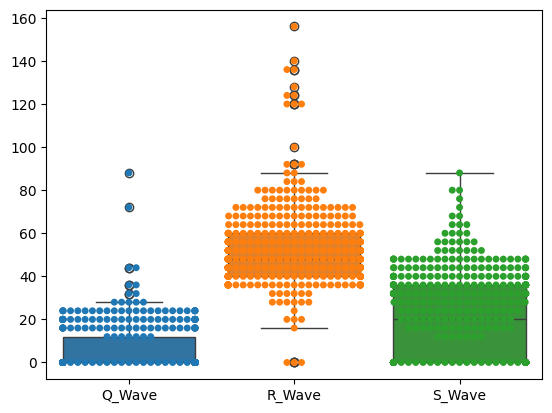

In [45]:
sns.boxplot(data=final_df[["Q_Wave","R_Wave","S_Wave"]])
sns.swarmplot(data=final_df[["Q_Wave","R_Wave","S_Wave"]]);

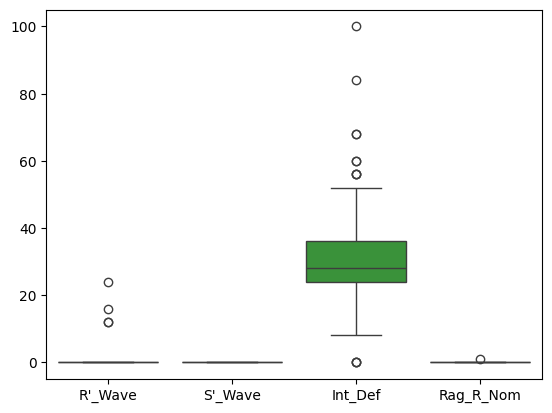

In [46]:
sns.boxplot(data=final_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);
#sns.swarmplot(data=final_df[['R'_Wave',"S'_Wave","Int_Def","Rag_R_Nom"]])

In [47]:
final_df["R'_Wave"].value_counts().sort_index(ascending=False)

R'_Wave
24.0      1
16.0      1
12.0      2
0.0     448
Name: count, dtype: int64

In [48]:
final_df["S'_Wave"].value_counts().sort_index(ascending=False)

S'_Wave
0.0    452
Name: count, dtype: int64

In [49]:
final_df["Rag_R_Nom"].value_counts().sort_index(ascending=False)

Rag_R_Nom
1.0      1
0.0    451
Name: count, dtype: int64

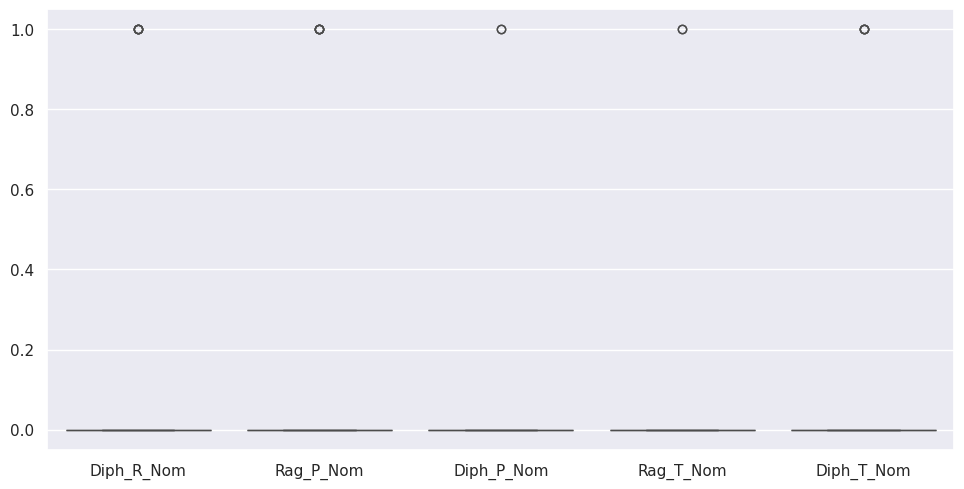

In [50]:
sns.set(rc={'figure.figsize':(11.7,5.72)})
sns.boxplot(data=final_df[["Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom"]]);

In [51]:
final_df["Diph_R_Nom"].value_counts().sort_index(ascending=False)

Diph_R_Nom
1.0      5
0.0    447
Name: count, dtype: int64

In [52]:
final_df["Rag_P_Nom"].value_counts().sort_index(ascending=False)

Rag_P_Nom
1.0      5
0.0    447
Name: count, dtype: int64

In [53]:
final_df["Diph_P_Nom"].value_counts().sort_index(ascending=False)

Diph_P_Nom
1.0      2
0.0    450
Name: count, dtype: int64

In [54]:
final_df["Rag_T_Nom"].value_counts().sort_index(ascending=False)

Rag_T_Nom
1.0      2
0.0    450
Name: count, dtype: int64

In [55]:
final_df["Diph_T_Nom"].value_counts().sort_index(ascending=False)

Diph_T_Nom
1.0      4
0.0    448
Name: count, dtype: int64

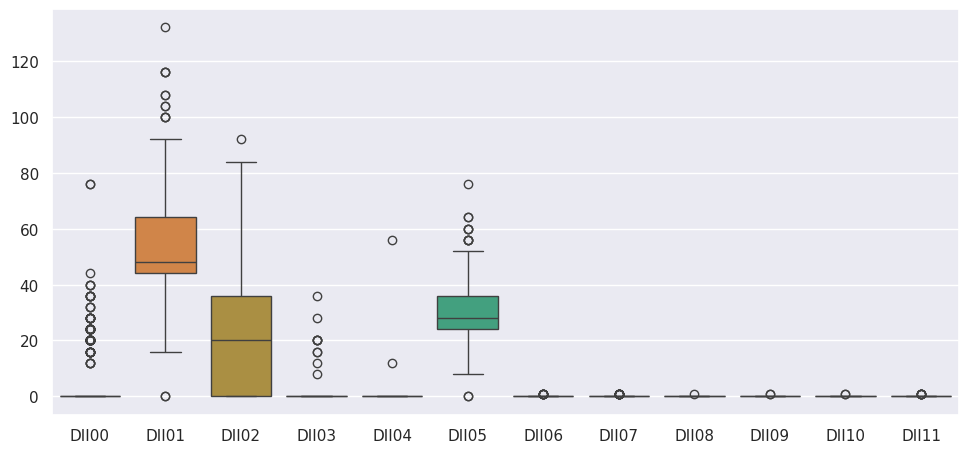

In [56]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["DII00","DII01","DII02","DII03","DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11"]]);

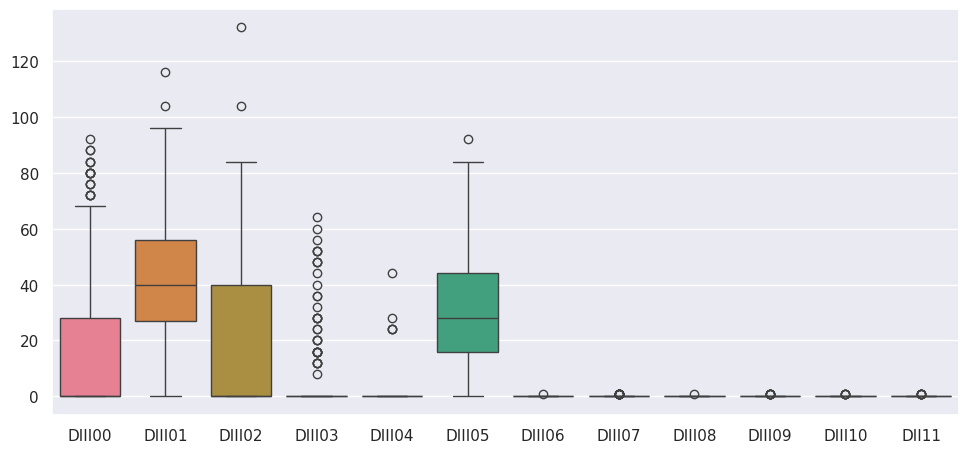

In [57]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["DIII00","DIII01","DIII02","DIII03","DIII04",
                           "DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DII11"]]);

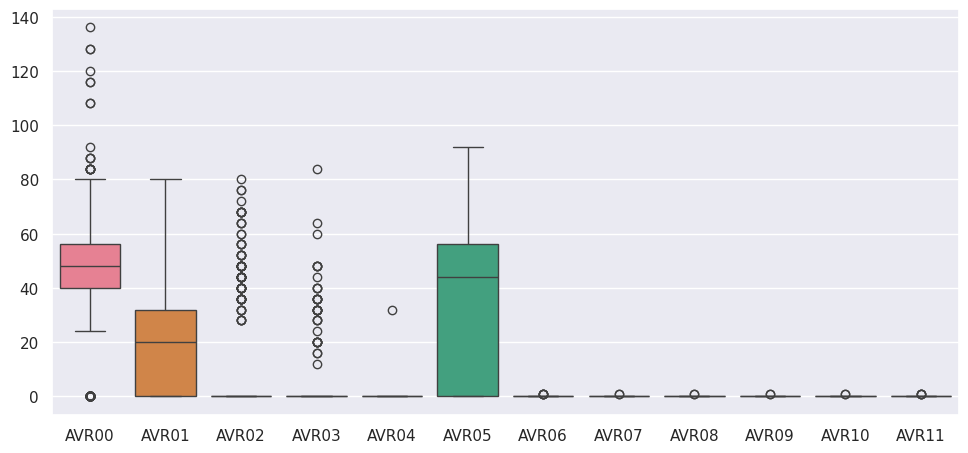

In [58]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVR00","AVR01","AVR02","AVR03","AVR04","AVR05",
                           "AVR06","AVR07","AVR08","AVR09","AVR10","AVR11"]]);

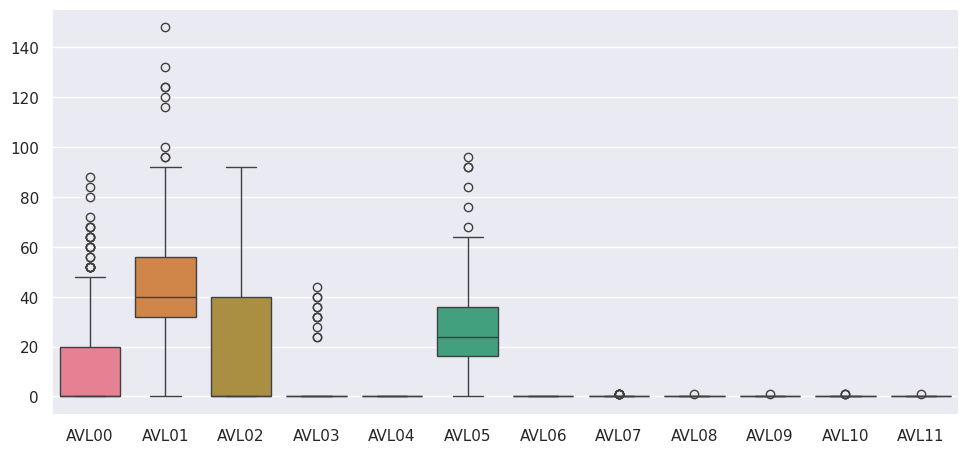

In [59]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVL00","AVL01","AVL02","AVL03","AVL04","AVL05",
                           "AVL06","AVL07","AVL08","AVL09","AVL10","AVL11"]]);

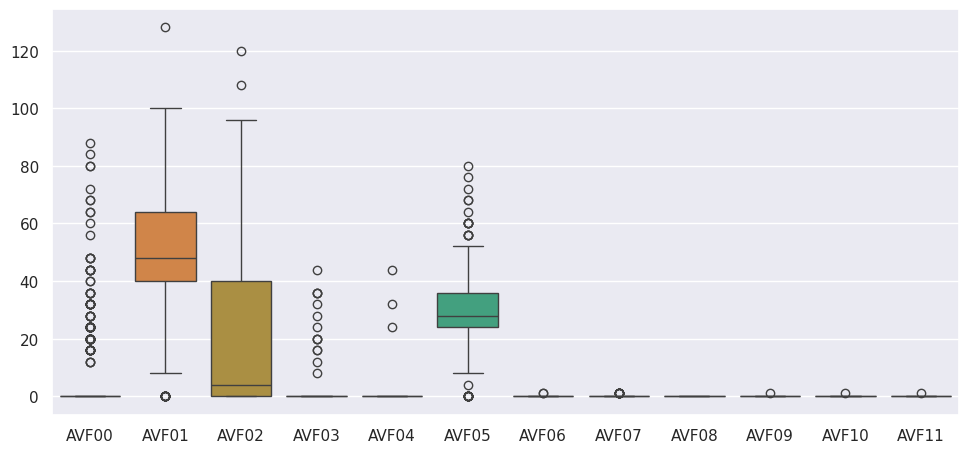

In [60]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVF00","AVF01","AVF02","AVF03","AVF04","AVF05",
                           "AVF06","AVF07","AVF08","AVF09","AVF10","AVF11"]]);

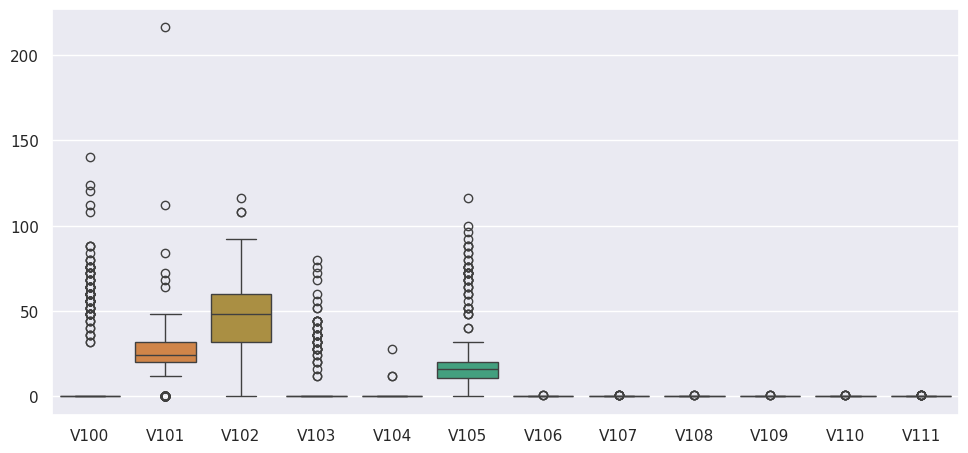

In [61]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V100","V101","V102","V103","V104","V105","V106",
                            "V107","V108","V109","V110","V111",]]);

In [62]:
final_df["V101"].value_counts().sort_index(ascending=False)

V101
216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: count, dtype: int64

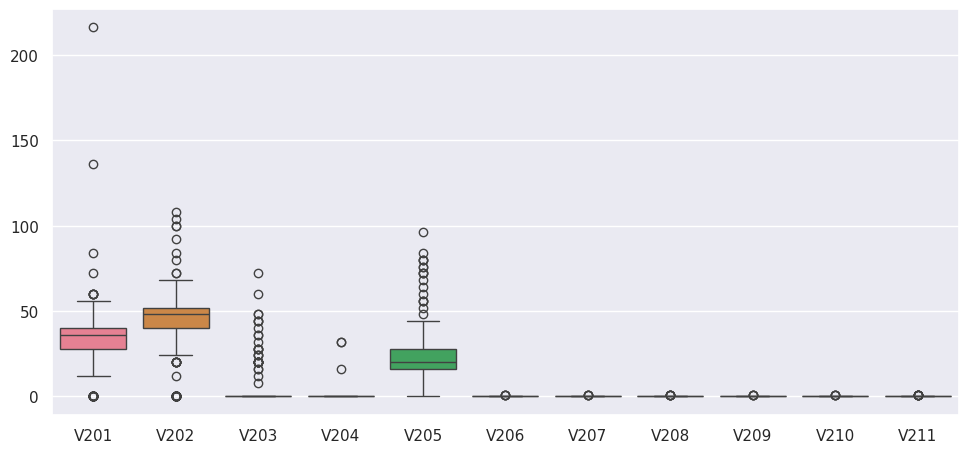

In [63]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V201","V202","V203","V204","V205",
                           "V206","V207","V208","V209","V210","V211"]]);

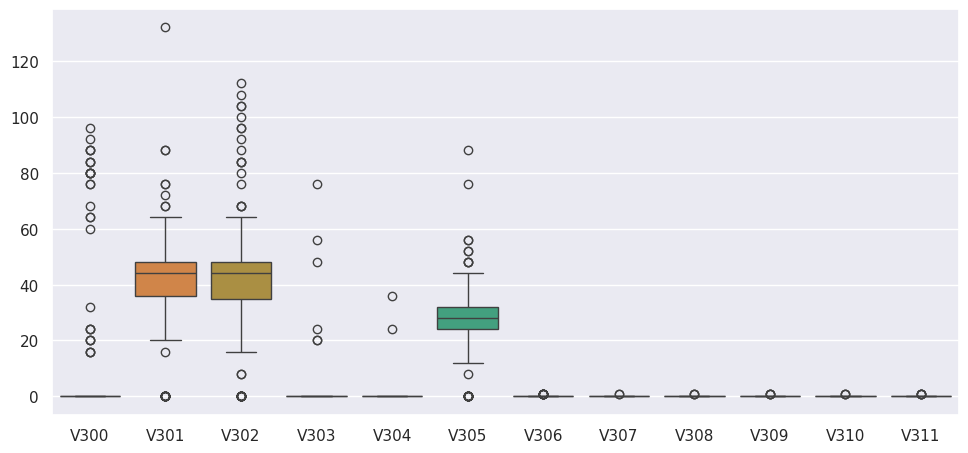

In [64]:
sns.set(rc={"figure.figsize":(11.7,5.27)})
sns.boxplot(data=final_df[["V300","V301","V302","V303","V304","V305",
                           "V306","V307","V308","V309","V310","V311"]]);

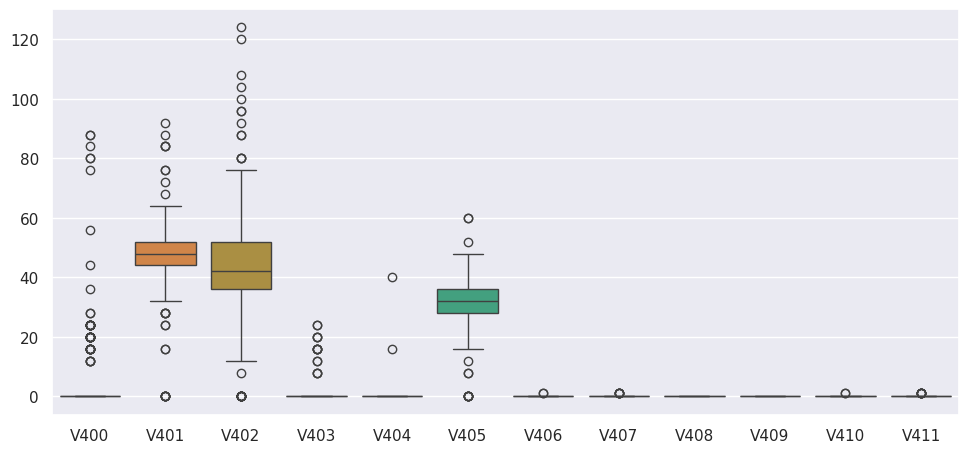

In [65]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V400","V401","V402","V403","V404","V405",
                           "V406","V407","V408","V409","V410","V411"]]);

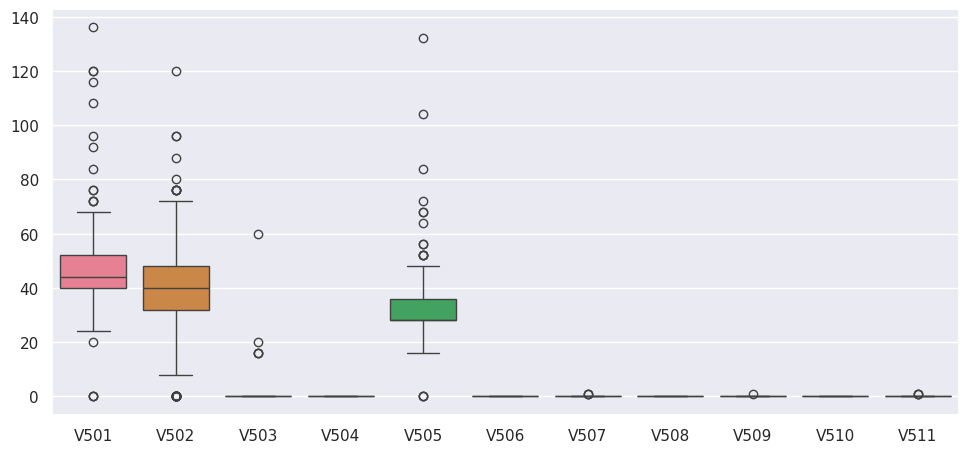

In [66]:
sns.set(rc={"figure.figsize":(11.7,5.27)})
sns.boxplot(data=final_df[["V501","V502","V503","V504","V505","V506",
                           "V507","V508","V509","V510","V511"]]);

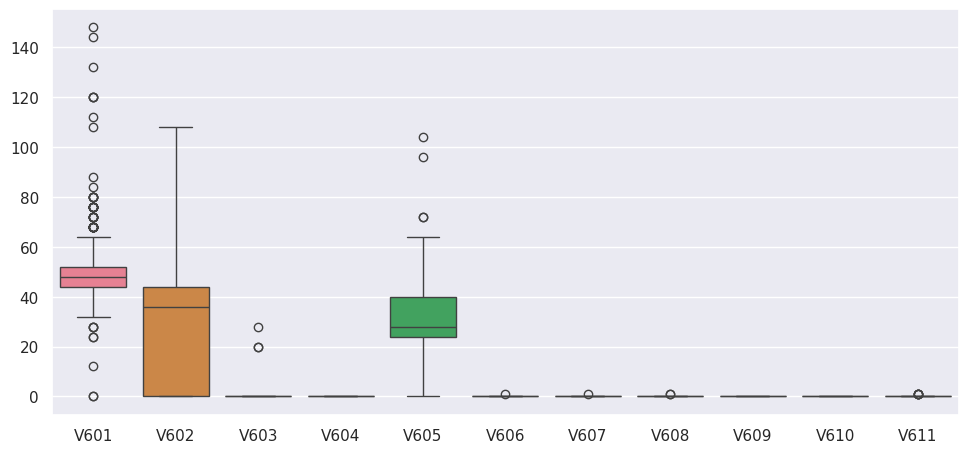

In [67]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V601","V602","V603","V604","V605","V606","V607",
                          "V608","V609","V610","V611",]]);

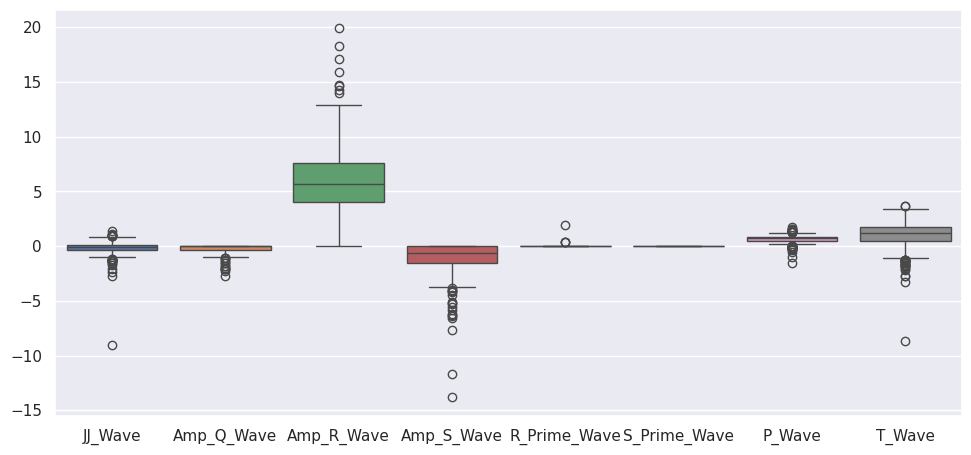

In [68]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["JJ_Wave","Amp_Q_Wave","Amp_R_Wave",
                           "Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave"]]);

<Axes: >

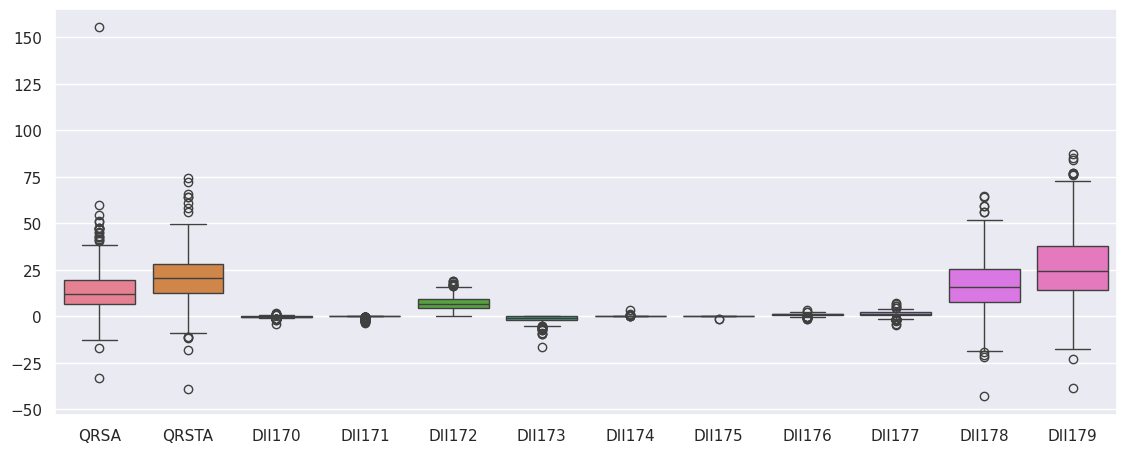

In [69]:
sns.set(rc={'figure.figsize':(13.7,5.27)})
sns.boxplot(data=final_df[["QRSA","QRSTA","DII170","DII171","DII172",
                           "DII173","DII174","DII175","DII176","DII177","DII178","DII179"]])

<Axes: >

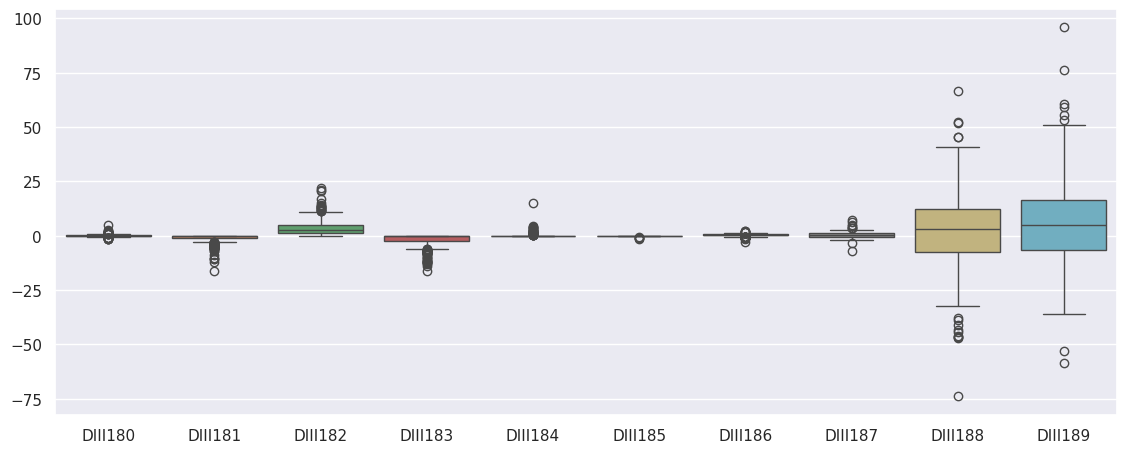

In [70]:
sns.set(rc={'figure.figsize':(13.7,5.27)})
sns.boxplot(data=final_df[["DIII180","DIII181","DIII182","DIII183","DIII184",
                           "DIII185","DIII186","DIII187","DIII188","DIII189"]])

<Axes: >

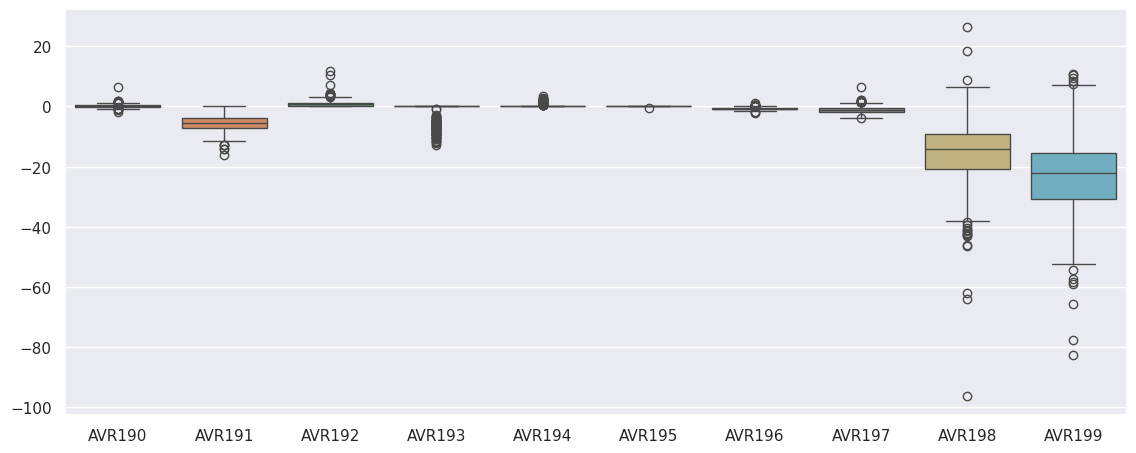

In [71]:
sns.set(rc={'figure.figsize':(13.7,5.27)})
sns.boxplot(data=final_df[["AVR190","AVR191","AVR192","AVR193","AVR194",
                           "AVR195","AVR196","AVR197","AVR198","AVR199"]])

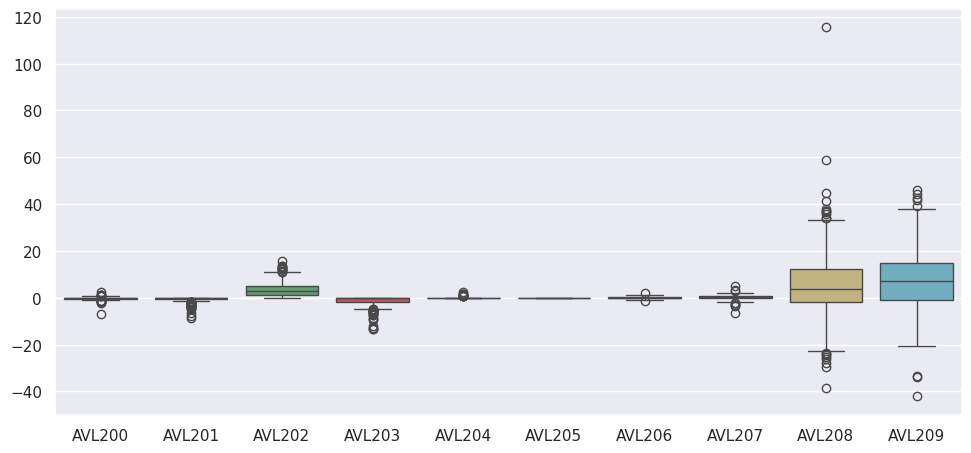

In [72]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVL200","AVL201","AVL202","AVL203","AVL204",
                           "AVL205","AVL206","AVL207","AVL208","AVL209"]]);

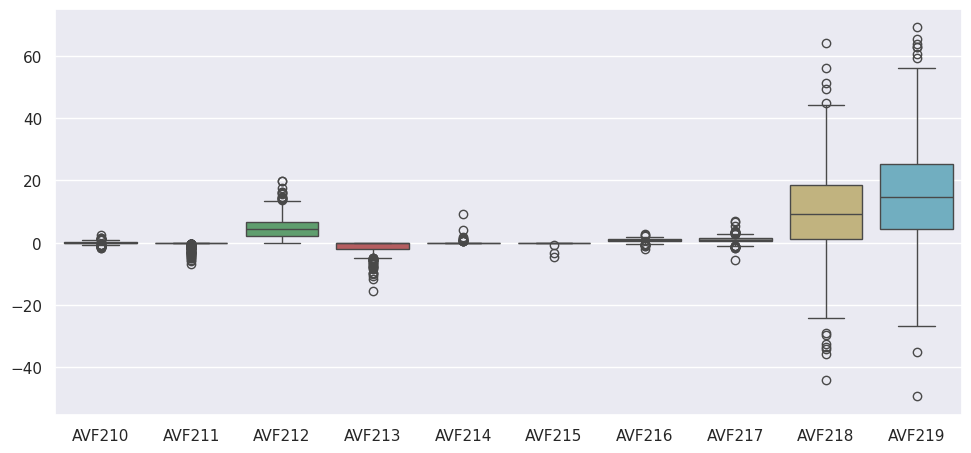

In [73]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVF210","AVF211","AVF212","AVF213","AVF214",
                           "AVF215","AVF216","AVF217","AVF218","AVF219"]]);

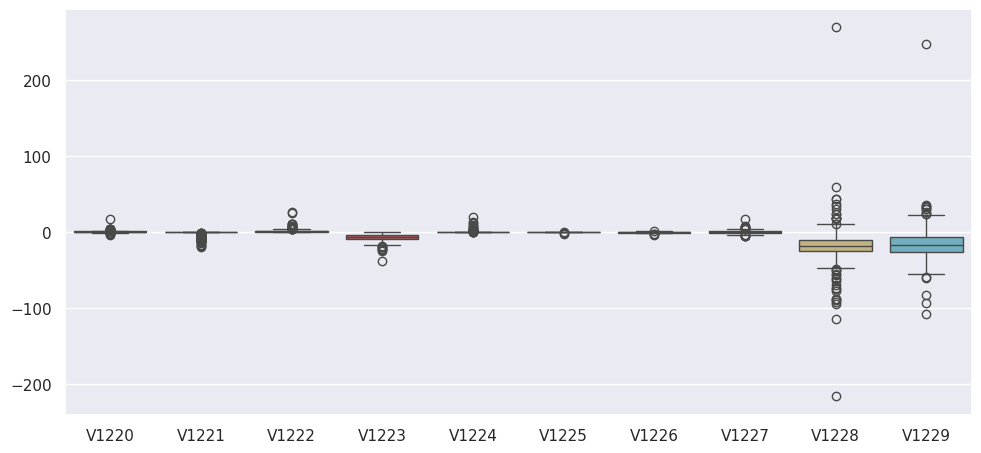

In [74]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V1220","V1221","V1222","V1223","V1224",
                           "V1225","V1226","V1227","V1228","V1229"]]);

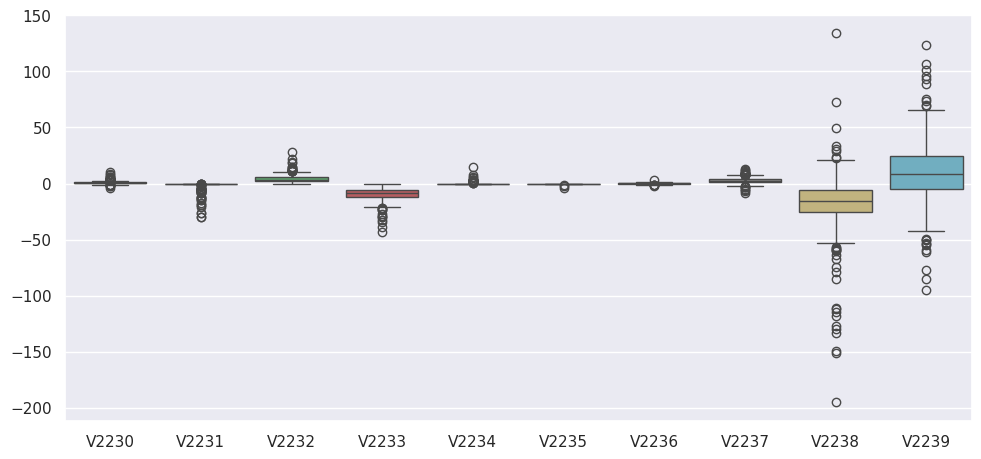

In [75]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V2230","V2231","V2232","V2233","V2234",
                           "V2235","V2236","V2237","V2238","V2239"]]);

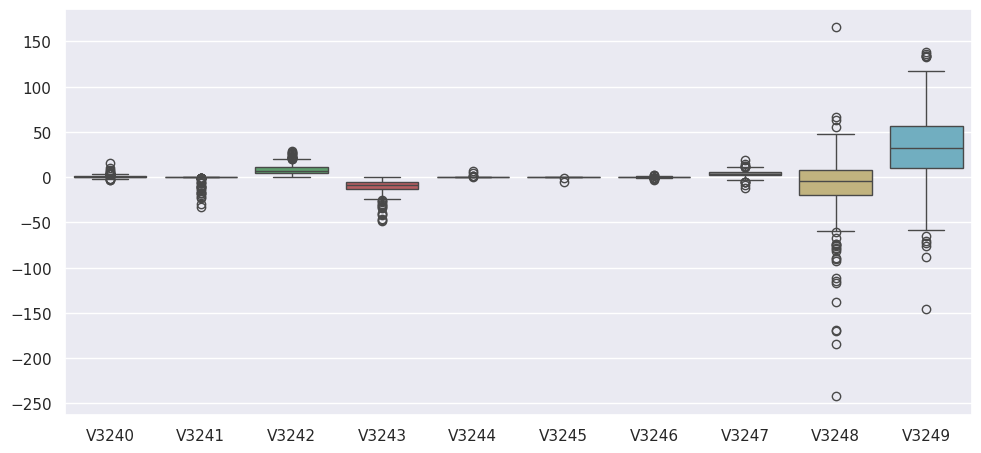

In [76]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V3240","V3241","V3242","V3243","V3244",
                           "V3245","V3246","V3247","V3248","V3249"]]);

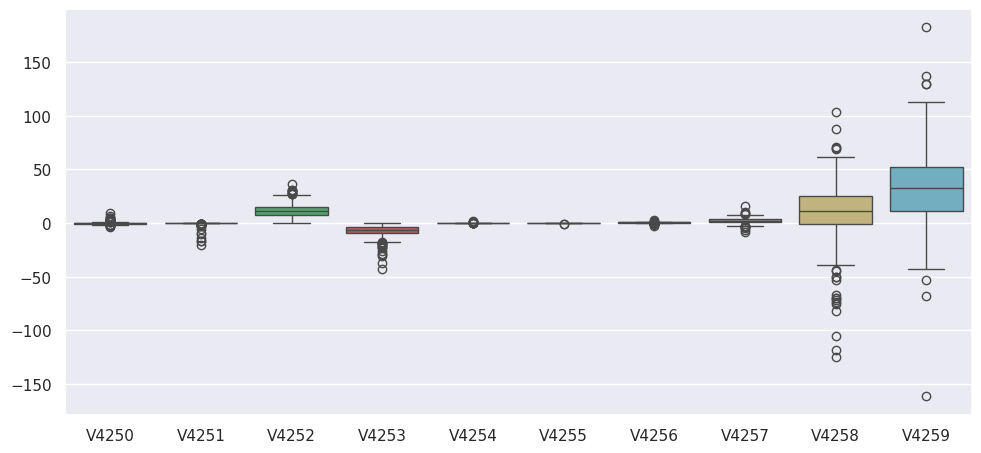

In [77]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V4250","V4251","V4252","V4253","V4254",
                           "V4255","V4256","V4257","V4258","V4259"]]);

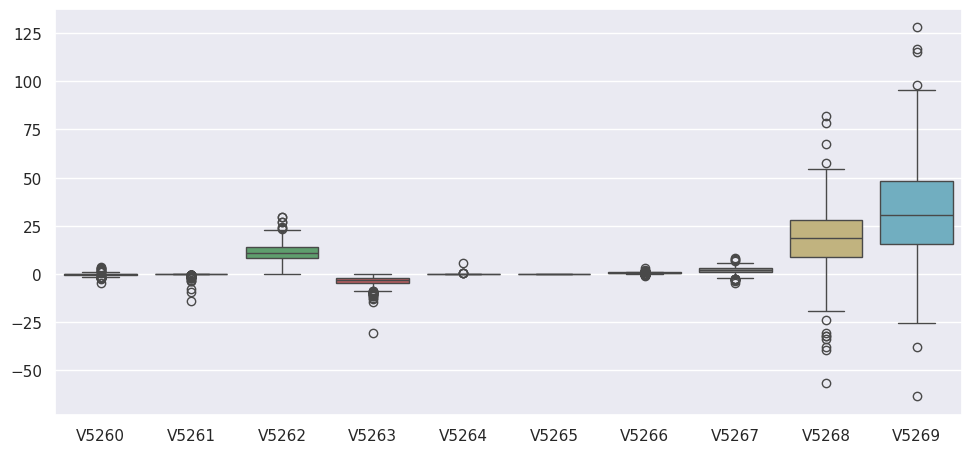

In [78]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V5260","V5261","V5262","V5263",
                           "V5264","V5265","V5266","V5267","V5268","V5269"]]);

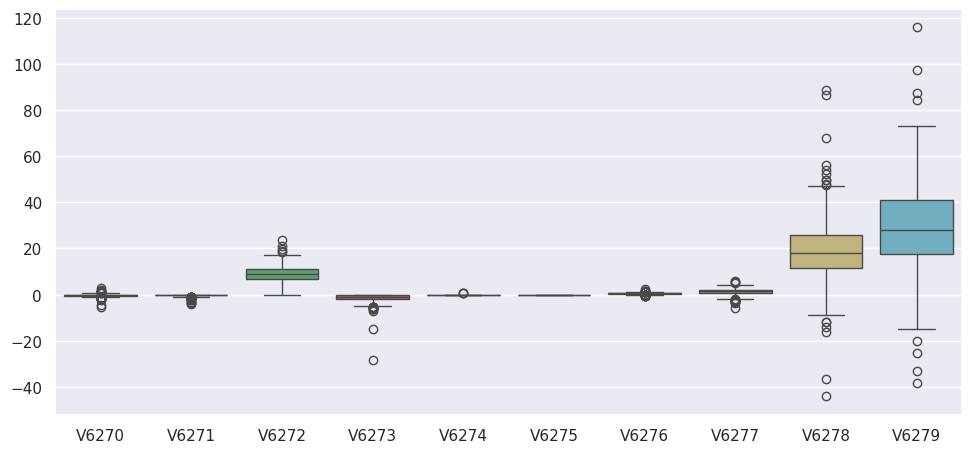

In [79]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V6270","V6271","V6272","V6273",
                           "V6274","V6275","V6276","V6277","V6278","V6279"]]);

## How Physical Condition Affects person's health

#### Understanding if a person's age influences their condition

In [80]:
class_list = []
j=1
new_class_names = []
for i in class_names:


    if(i != "1.Degree AtrioVentricular block" and i != '2.Degree AV block' and i != "3.Degree AV block"):
        class_list.append([j,i,grouped_mean["Age"][j],grouped_median["Age"][j],grouped_mode["Age"][j],grouped_std["Age"][j]])
        new_class_names.append(i)
    j+=1
AgeClass = {
    "AgeAVG": grouped_mean["Age"],"AgeMdian":grouped_median["Age"],
            "AgeMode":grouped_mode["Age"],"AgeStd":grouped_std['Age'],"Class":new_class_names}
AgeClassDF = pd.DataFrame(AgeClass)

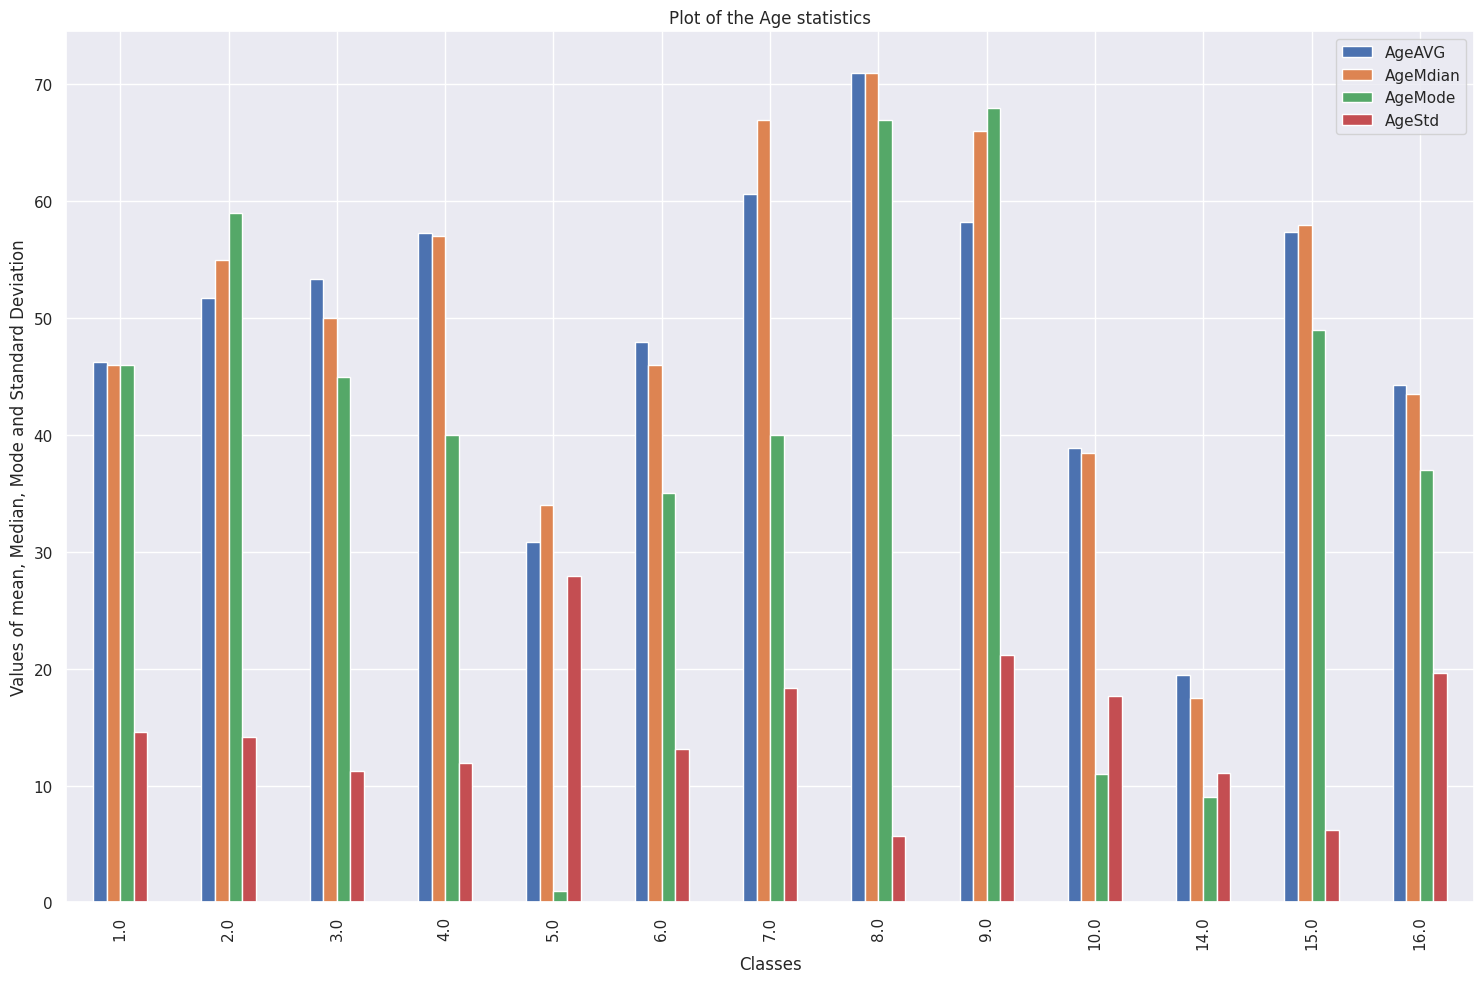

,AgeAVG,AgeMdian,AgeMode,AgeStd,Class
class,,,,,
1.0,46.273469,46.0,46.0,14.556092,Normal
2.0,51.750000,55.0,59.0,14.160418,Ischemic changes (CAD)
3.0,53.333333,50.0,45.0,11.286317,Old Anterior Myocardial Infraction
4.0,57.266667,57.0,40.0,11.895177,Old Inferior Myocardial Infraction
5.0,30.846154,34.0,1.0,27.904140,Sinus tachycardy
6.0,47.920000,46.0,35.0,13.165359,Sinus bradycardy
7.0,60.666667,67.0,40.0,18.339393,Ventricular Premature Contraction (PVC)
8.0,71.000000,71.0,67.0,5.656854,Supraventricular Premature Contraction
9.0,58.222222,66.0,68.0,21.211894,Left Boundle branch block


In [81]:
fig, ax = plt.subplots(figsize=(15,10))
AgeClassDF.plot(kind='bar',ax=ax)
ax.set_title("Plot of the Age statistics")
ax.set_ylabel("Values of mean, Median, Mode and Standard Deviation")
ax.set_xlabel('Classes')
fig.tight_layout()
plt.show()
AgeClassDF

In [82]:
class_list=[]
j=1
new_class_names=[]
for i in class_names:
    if(i != "1.Degree AtrioVentricular block" and i != "3.Degree AV block" and i != "2.Degree AV block"):
        class_list.append([j,i,grouped_mean["Sex"][j],grouped_median["Sex"][j],grouped_mode["Sex"][j],grouped_std["Sex"][j]])
        new_class_names.append(i)
    j+=1
SexClass = {
    "SexAVG": grouped_mean["Sex"],"SexMdian":grouped_median["Sex"],
            "SexMode":grouped_mode["Sex"],"SexStd":grouped_std["Sex"],"Class":new_class_names}
SexClassDF = pd.DataFrame(SexClass)

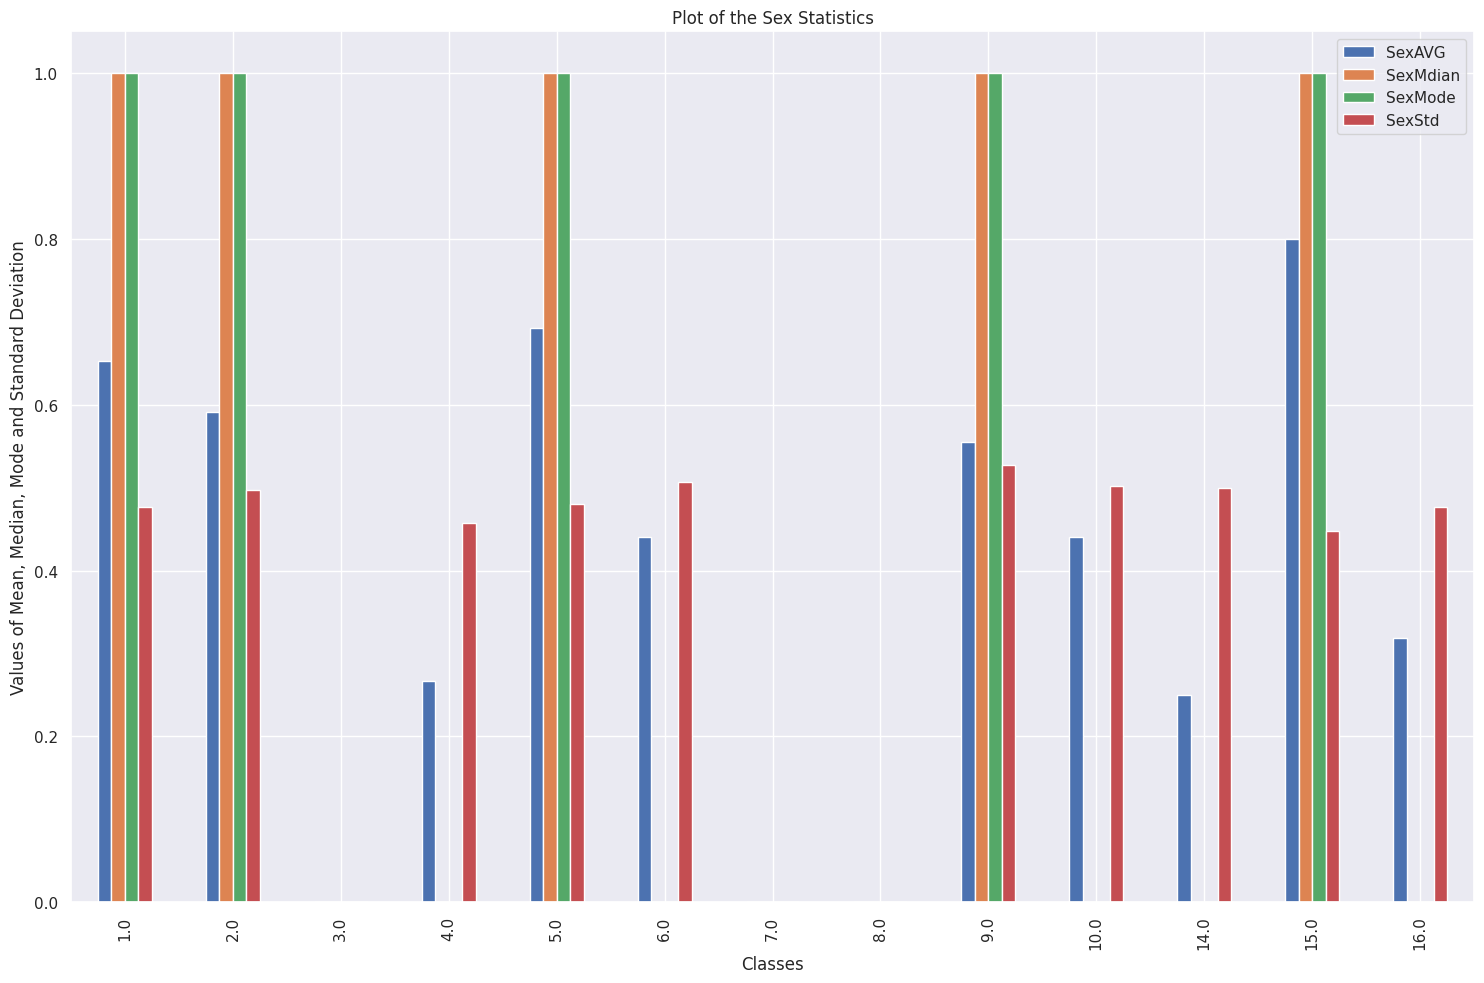

,SexAVG,SexMdian,SexMode,SexStd,Class
class,,,,,
1.0,0.653061,1.0,1.0,0.476970,Normal
2.0,0.590909,1.0,1.0,0.497350,Ischemic changes (CAD)
3.0,0.000000,0.0,0.0,0.000000,Old Anterior Myocardial Infraction
4.0,0.266667,0.0,0.0,0.457738,Old Inferior Myocardial Infraction
5.0,0.692308,1.0,1.0,0.480384,Sinus tachycardy
6.0,0.440000,0.0,0.0,0.506623,Sinus bradycardy
7.0,0.000000,0.0,0.0,0.000000,Ventricular Premature Contraction (PVC)
8.0,0.000000,0.0,0.0,0.000000,Supraventricular Premature Contraction
9.0,0.555556,1.0,1.0,0.527046,Left Boundle branch block


In [83]:
fig, ax = plt.subplots(figsize=(15,10))
SexClassDF.plot(kind="bar",ax=ax)
ax.set_title("Plot of the Sex Statistics")
ax.set_ylabel("Values of Mean, Median, Mode and Standard Deviation")
ax.set_xlabel("Classes")
fig.tight_layout()
plt.show()
SexClassDF

In [84]:
class_list = []
j = 1
new_class_names =[]
for i in class_names:
   
    if(i != "1.Degree AtrioVentricular block" and i!= '3.Degree AV block' and i!= "2.Degree AV block"  ):
        class_list.append([j,i,grouped_mean["Weight"][j],grouped_median["Weight"][j],grouped_mode["Weight"][j],grouped_std["Weight"][j]])
        new_class_names.append(i)
    j+=1
WeightClass = {
    "WeightAVG": grouped_mean["Weight"],"WeightMdian":grouped_median["Weight"],
            "WeightMode": grouped_mode["Weight"],"WeightStd":grouped_std['Weight'],"Class":new_class_names }
WeightClassDF =pd.DataFrame(WeightClass)

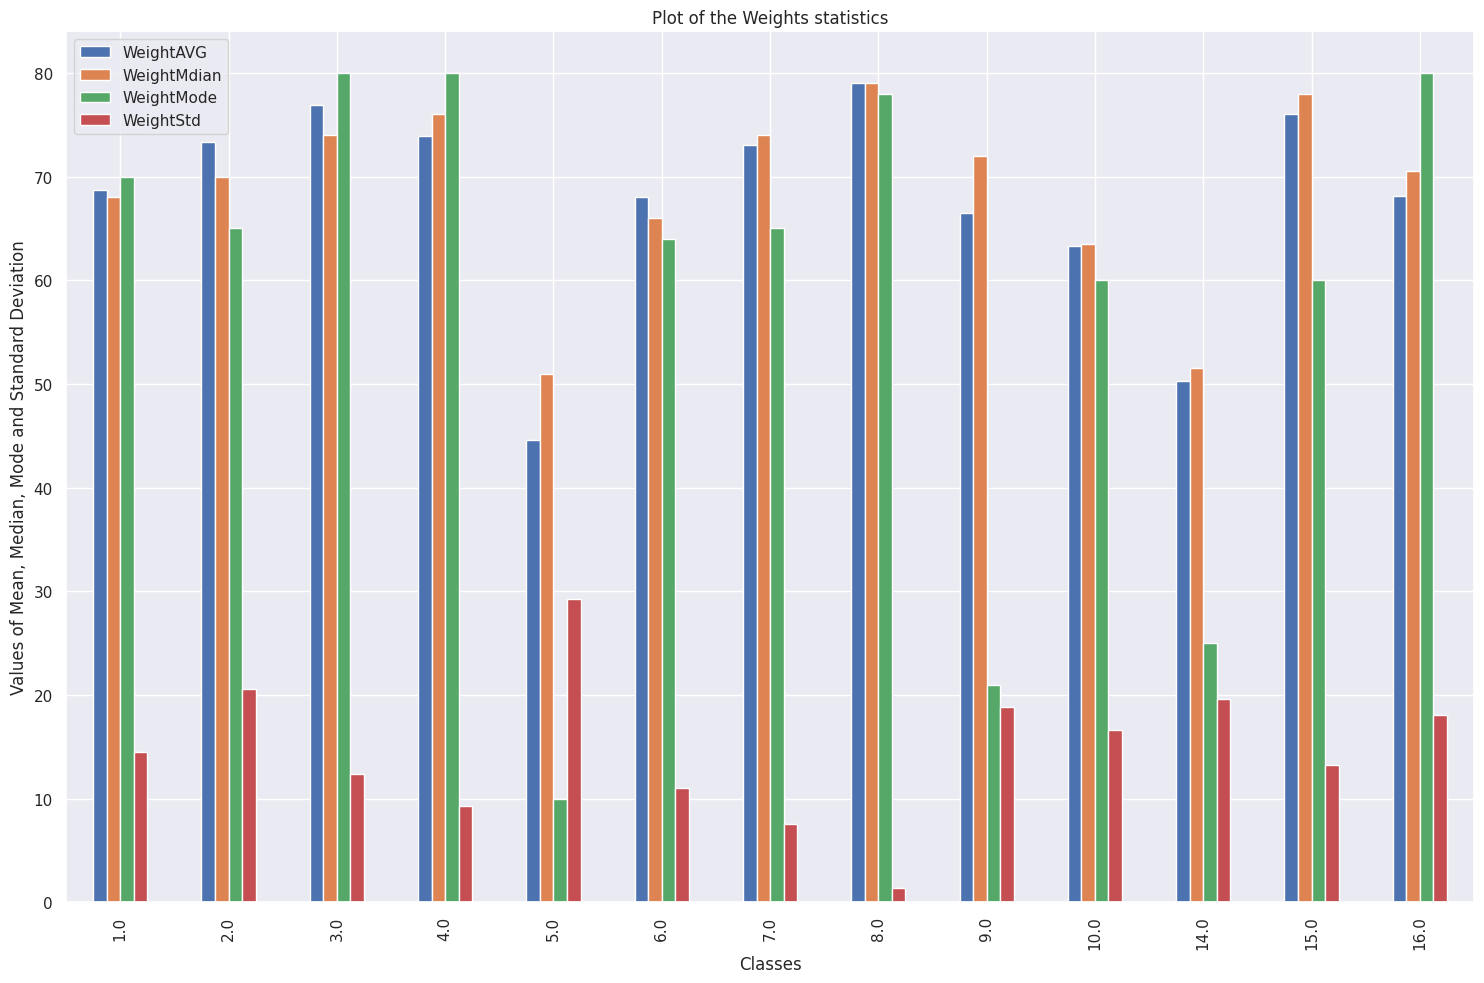

,WeightAVG,WeightMdian,WeightMode,WeightStd,Class
class,,,,,
1.0,68.669388,68.0,70.0,14.454595,Normal
2.0,73.363636,70.0,65.0,20.617323,Ischemic changes (CAD)
3.0,76.866667,74.0,80.0,12.397388,Old Anterior Myocardial Infraction
4.0,73.866667,76.0,80.0,9.318696,Old Inferior Myocardial Infraction
5.0,44.615385,51.0,10.0,29.259011,Sinus tachycardy
6.0,68.000000,66.0,64.0,11.045361,Sinus bradycardy
7.0,73.000000,74.0,65.0,7.549834,Ventricular Premature Contraction (PVC)
8.0,79.000000,79.0,78.0,1.414214,Supraventricular Premature Contraction
9.0,66.444444,72.0,21.0,18.808981,Left Boundle branch block


In [85]:
fig, ax = plt.subplots(figsize=(15,10))
WeightClassDF.plot(kind="bar", ax=ax)
ax.set_title("Plot of the Weights statistics")
ax.set_ylabel("Values of Mean, Median, Mode and Standard Deviation")
ax.set_xlabel("Classes")
fig.tight_layout()
plt.show()
WeightClassDF

In [86]:
class_list = []
j = 1
new_class_names = []
for i in class_names:

    if(i != "1.Degree AtrioVentricular block" and i != "2.Degree AV block" and i != "3.Degree AV block"):
        class_list.append([j,i,grouped_mean["Height"][j],grouped_median["Height"][j],grouped_mode["Height"][j]])
        new_class_names.append(i)
    j+=1
HeightClass = {
    "HeightAVG": grouped_mean["Height"],"HeightMdian":grouped_median["Height"],
            "HeightMode": grouped_mode["Height"],"HeightStd":grouped_std["Height"],"Class":new_class_names}
HeightClassDF = pd.DataFrame(HeightClass)

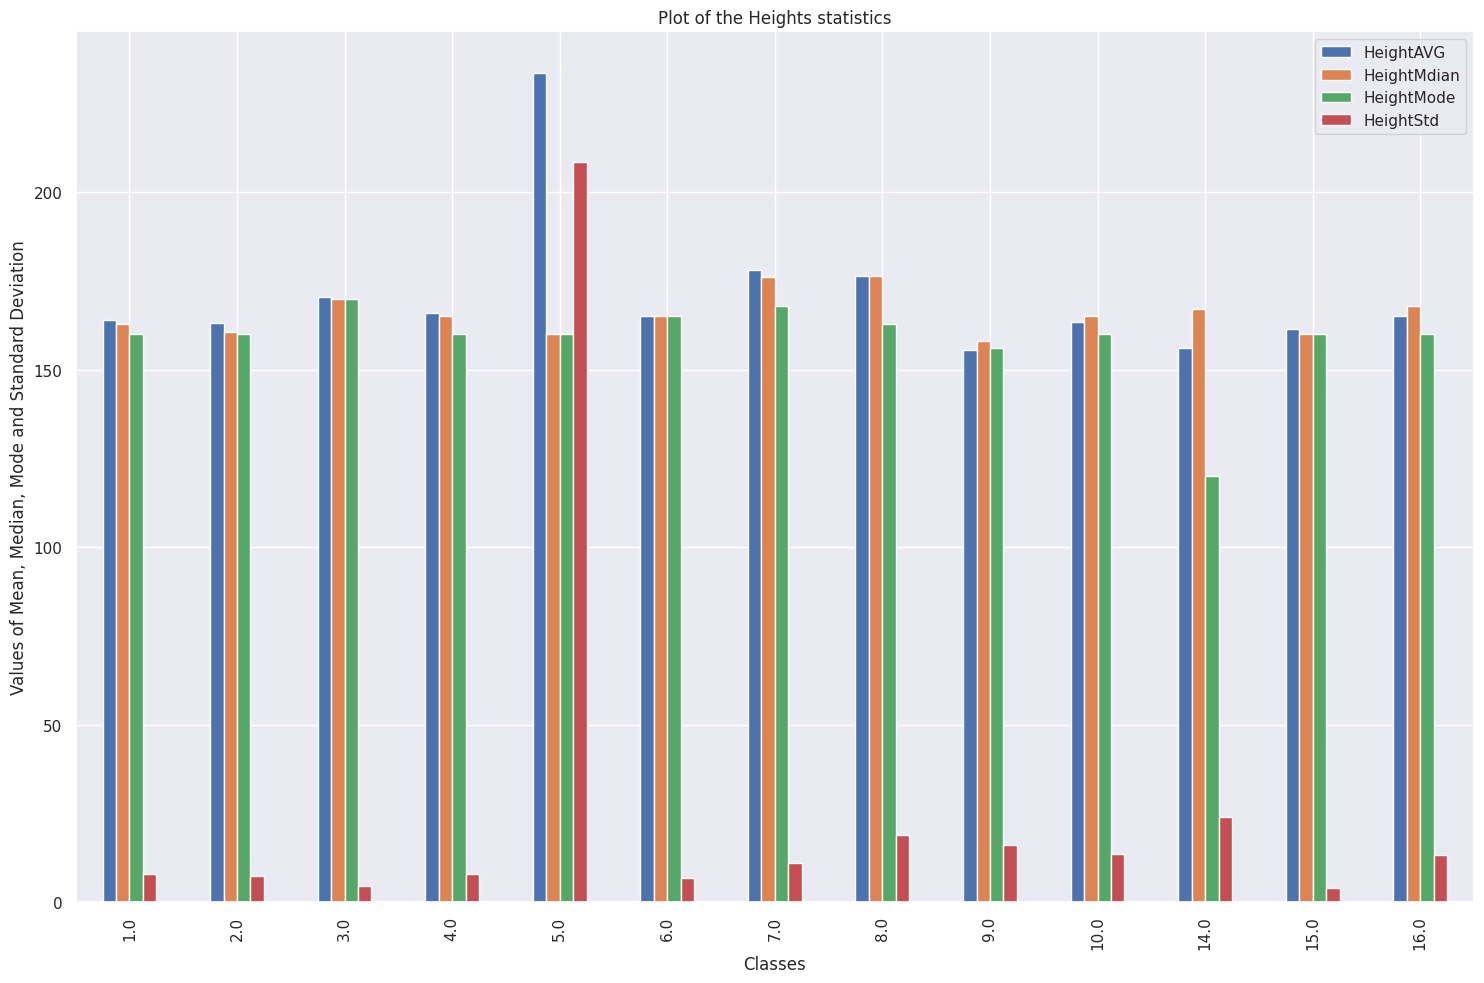

,HeightAVG,HeightMdian,HeightMode,HeightStd,Class
class,,,,,
1.0,164.102041,163.0,160.0,8.048126,Normal
2.0,163.068182,160.5,160.0,7.456534,Ischemic changes (CAD)
3.0,170.600000,170.0,170.0,4.579457,Old Anterior Myocardial Infraction
4.0,166.000000,165.0,160.0,7.973169,Old Inferior Myocardial Infraction
5.0,233.615385,160.0,160.0,208.500015,Sinus tachycardy
6.0,165.040000,165.0,165.0,6.996904,Sinus bradycardy
7.0,178.000000,176.0,168.0,11.135529,Ventricular Premature Contraction (PVC)
8.0,176.500000,176.5,163.0,19.091883,Supraventricular Premature Contraction
9.0,155.666667,158.0,156.0,16.209565,Left Boundle branch block


In [87]:
fig, ax = plt.subplots(figsize=(15,10))
HeightClassDF.plot(kind="bar",ax=ax)
ax.set_title("Plot of the Heights statistics")
ax.set_ylabel("Values of Mean, Median, Mode and Standard Deviation")
ax.set_xlabel("Classes")
fig.tight_layout()
plt.show()
HeightClassDF

In [88]:
class_list = []
j = 1
new_class_names =[]
for i in class_names:
   
    if(i != "1.Degree AtrioVentricular block" and i!= '3.Degree AV block' and i!= "2.Degree AV block"  ):
        class_list.append([j,i,grouped_mean["QRS_Dur"][j],grouped_median["QRS_Dur"][j],grouped_mode["QRS_Dur"][j],grouped_std["QRS_Dur"][j]])
        new_class_names.append(i)
    j+=1
QRSTClass = {
    "QRSDAVG": grouped_mean["QRS_Dur"],"QRSDMdian":grouped_median["QRS_Dur"],
            "QRSDMode": grouped_mode["QRS_Dur"],"QRSDStd":grouped_std['QRS_Dur'],"Class":new_class_names }
QRSTClassDF =pd.DataFrame(QRSTClass)

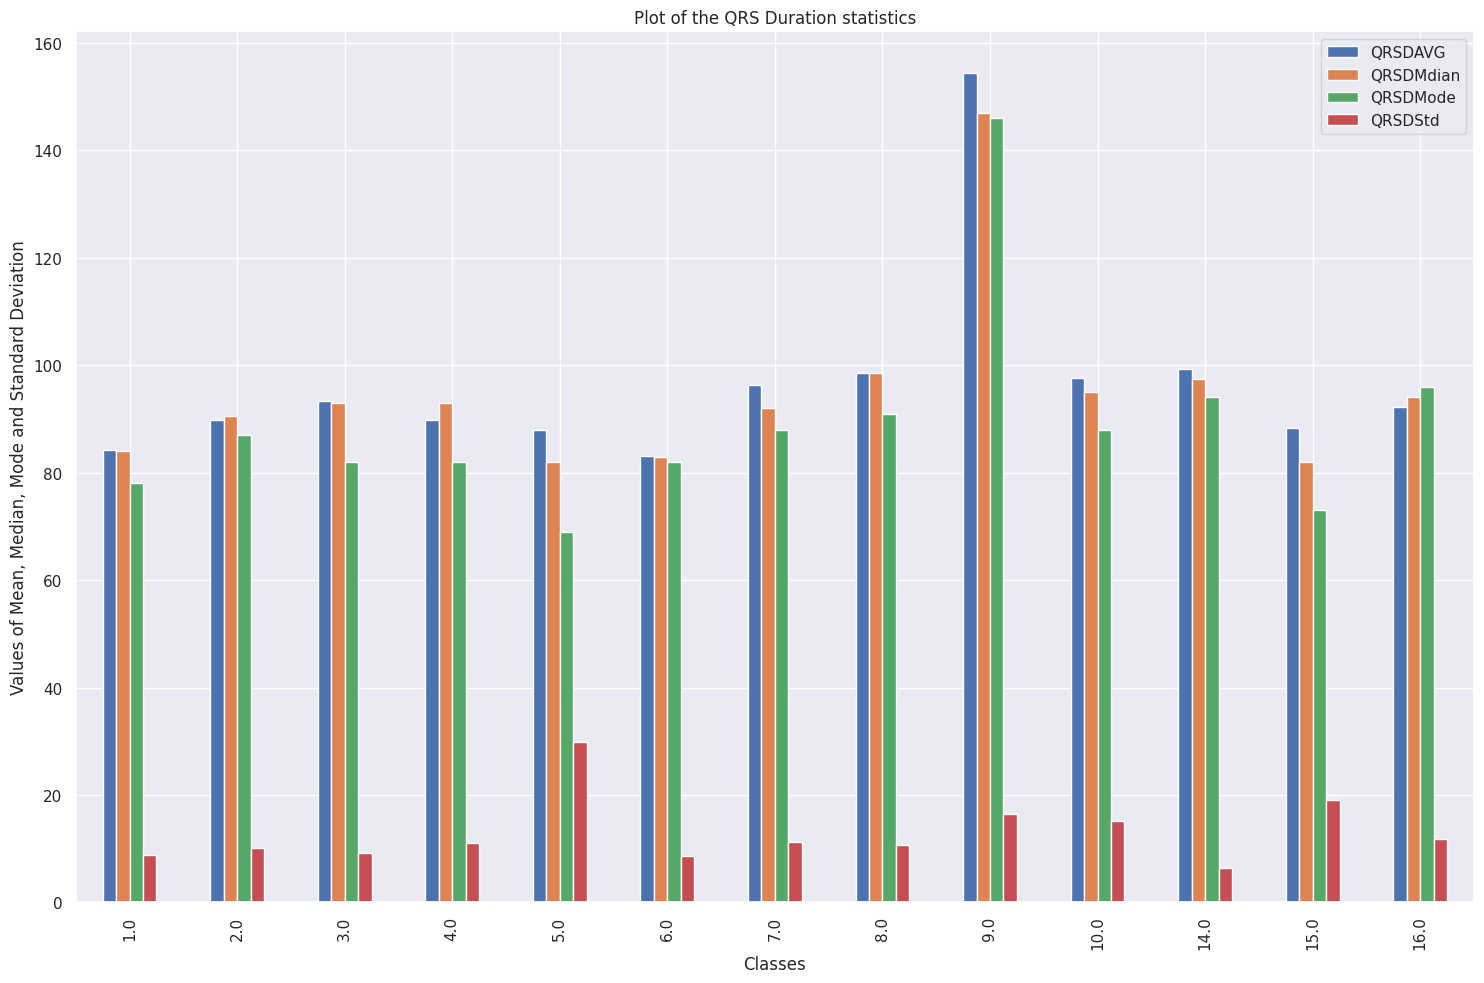

,QRSDAVG,QRSDMdian,QRSDMode,QRSDStd,Class
class,,,,,
1.0,84.277551,84.0,78.0,8.735439,Normal
2.0,89.818182,90.5,87.0,10.207778,Ischemic changes (CAD)
3.0,93.333333,93.0,82.0,9.131317,Old Anterior Myocardial Infraction
4.0,89.866667,93.0,82.0,10.979635,Old Inferior Myocardial Infraction
5.0,88.000000,82.0,69.0,29.796532,Sinus tachycardy
6.0,83.160000,83.0,82.0,8.561931,Sinus bradycardy
7.0,96.333333,92.0,88.0,11.150486,Ventricular Premature Contraction (PVC)
8.0,98.500000,98.5,91.0,10.606602,Supraventricular Premature Contraction
9.0,154.444444,147.0,146.0,16.409685,Left Boundle branch block


In [89]:
fig, ax = plt.subplots(figsize=(15,10))
QRSTClassDF.plot(kind="bar",ax=ax)
ax.set_title("Plot of the QRS Duration statistics")
ax.set_ylabel("Values of Mean, Median, Mode and Standard Deviation")
ax.set_xlabel("Classes")
fig.tight_layout()
plt.show()
QRSTClassDF

## Distribution plotting

#### We study the distributions and joint distributions of the features analyzed above

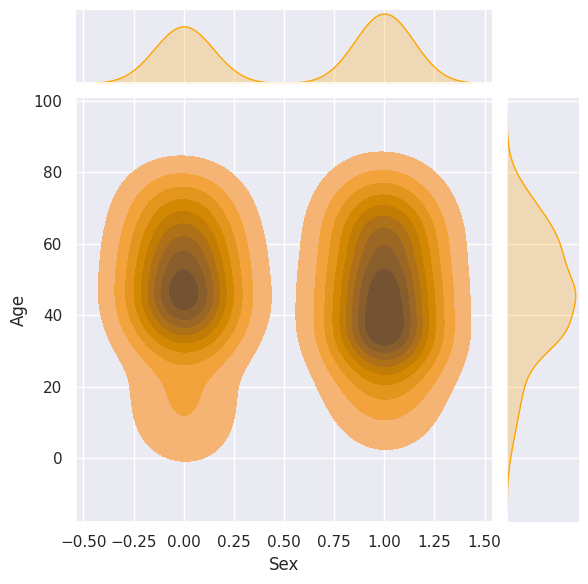

In [113]:
sns.jointplot(x="Sex",y="Age", data=final_df, kind='kde', color='orange', fill=True)

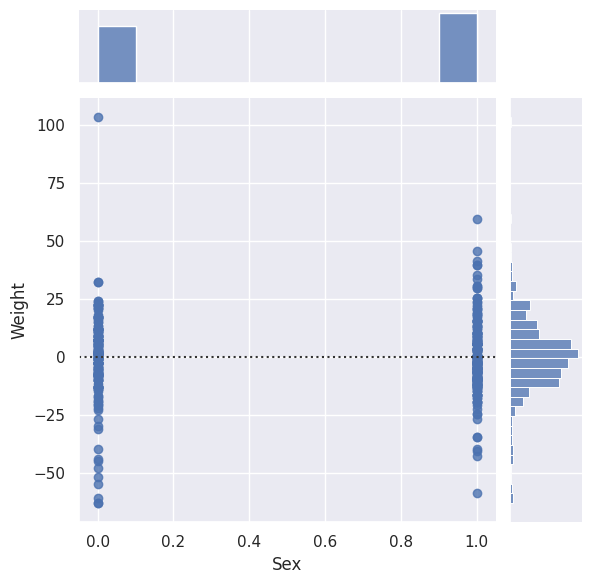

In [111]:
sns.jointplot(x="Sex",y="Weight", data=final_df, kind="resid",)

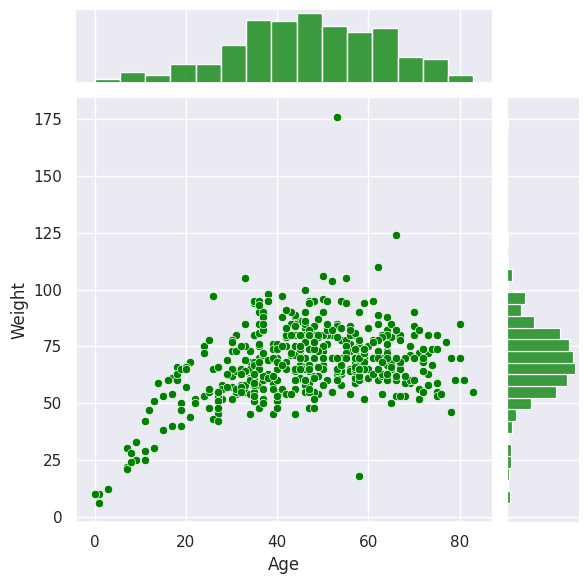

In [105]:
sns.jointplot(x="Age",y="Weight", data=final_df, kind="scatter", color='green')

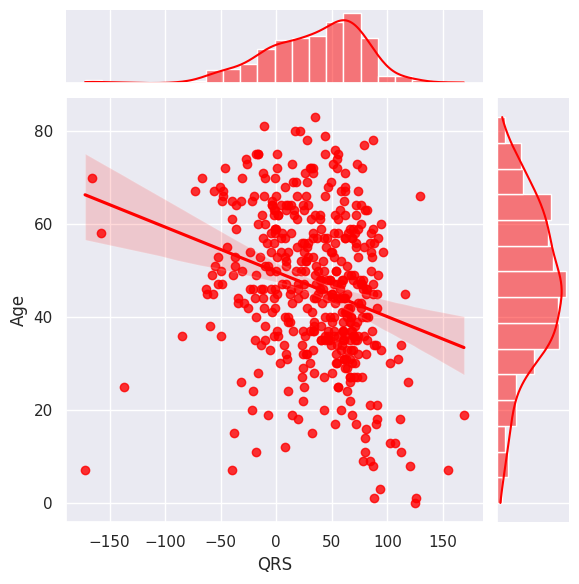

In [109]:
sns.jointplot(x="QRS",y="Age",data=final_df,kind='reg',color='red',)

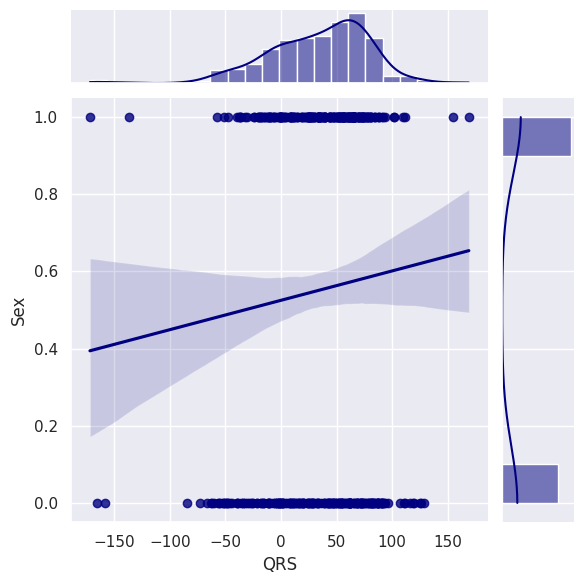

In [114]:
sns.jointplot(x="QRS",y="Sex",data=final_df, kind='reg',color="navy")

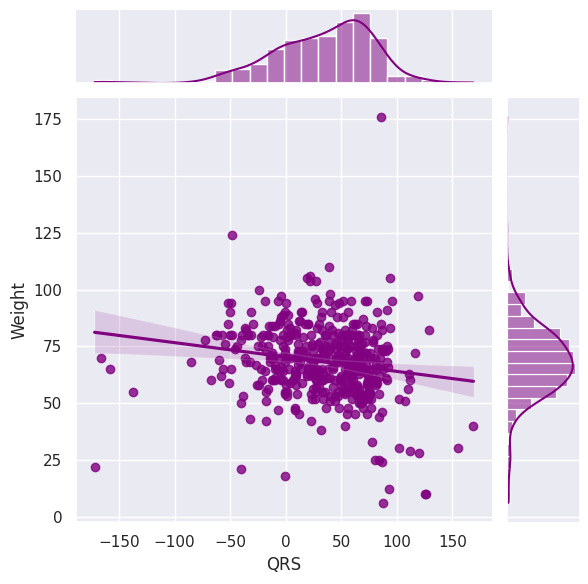

In [120]:
sns.jointplot(x="QRS",y="Weight",data=final_df,kind='reg', color='purple')

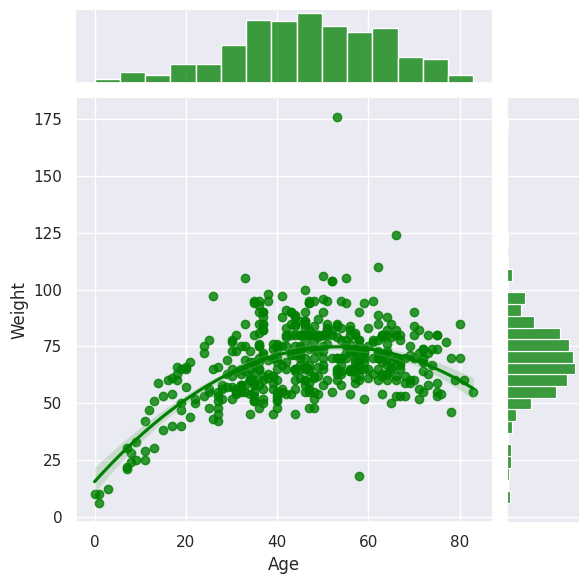

In [131]:
g = sns.JointGrid(x="Age", y="Weight", data=final_df) 
g.plot_joint(sns.regplot, order=2, color="green") 
g.plot_marginals(sns.histplot,color="green")

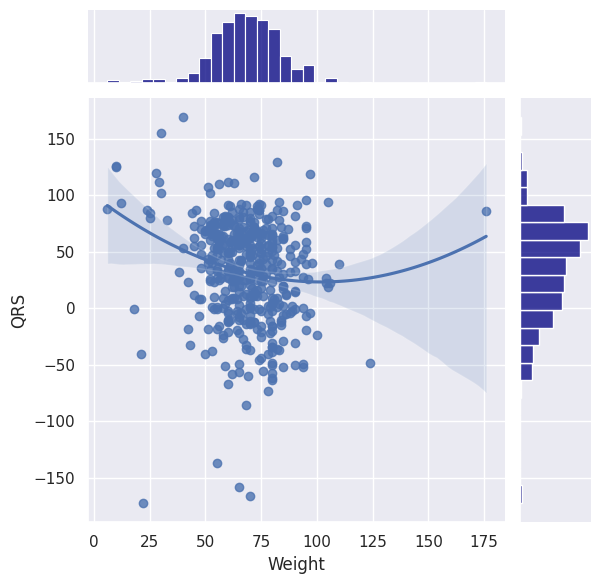

In [132]:
g=sns.JointGrid(x='Weight',y='QRS',data=final_df)
g.plot_joint(sns.regplot,order=2)
g.plot_marginals(sns.histplot,color="navy")

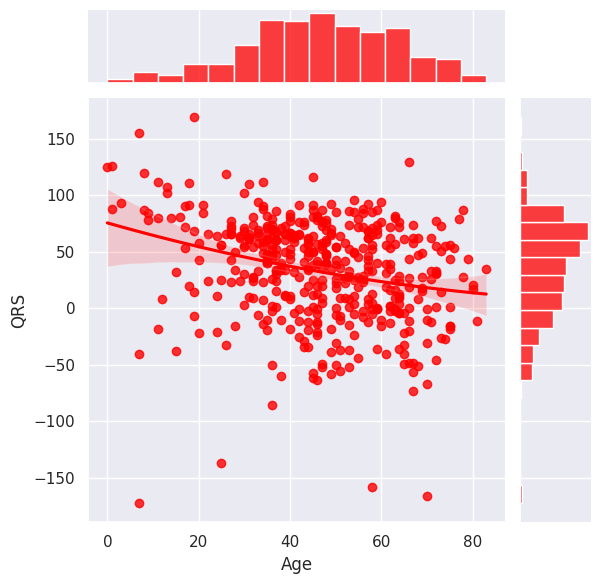

In [134]:
g=sns.JointGrid(x="Age",y="QRS",data=final_df)
g.plot_joint(sns.regplot,order=2, color='red')
g.plot_marginals(sns.histplot, color = 'red')